In [ ]:
!pip install scipy==1.7.3

# Import data 

Connect to kaggles

In [1]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/Colab_Notebooks/kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

cp: cannot stat '/content/drive/MyDrive/Colab_Notebooks/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


Download the data 

In [2]:
!kaggle datasets download -d spscientist/students-performance-in-exams

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


Saved as DataFrame

In [3]:

import zipfile
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
 
# read the dataset using the compression zip
df = pd.read_csv('/content/drive/MyDrive/Datasets//students-performance-in-exams.zip',compression='zip')


df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


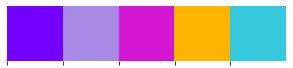

In [4]:
# Color Palette
custom_colors = ['#7400ff', '#a788e4', '#d216d2', '#ffb500', '#36c9dd']
sns.palplot(sns.color_palette(custom_colors))

# Set Style
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)

# Set tick size
plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)

# First impressions

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


 8 columns 4 categories and 3 numeric 

 1000 rows no nulls 

# Target variables

In [6]:
df.describe(include ='int')

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
categorical = [var for var in df.columns if df[var].dtype=='O']
numeric = [var for var in df.columns if df[var].dtype=="int"]

Red is mean and green is median
Mean - Median = 0.089


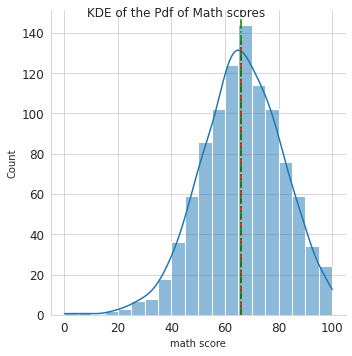

In [8]:
plot = sns.displot(data=df,x="math score",kind ="hist",bins=20, kde=True)
plot.fig.suptitle("KDE of the Pdf of Math scores")
plt.axvline (df["math score"].mean(), 0,0.9, color="r", linestyle="--")
plt.axvline(df["math score"].median(), 0,1, color="g", linestyle="-.")
print("Red is mean and green is median")
diff= df["math score"].mean() -df["math score"].median()
print("Mean - Median =", round(diff,3))



Red is mean and green is median
Mean - Median = -0.831


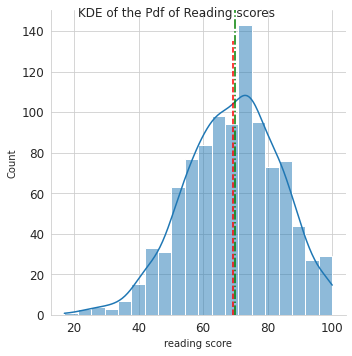

In [9]:
plot = sns.displot(data=df,x="reading score",kind ="hist",bins=20, kde=True)
plot.fig.suptitle("KDE of the Pdf of Reading scores")
plt.axvline (df["reading score"].mean(), 0,0.9, color="r", linestyle="--")
plt.axvline(df["reading score"].median(), 0,1, color="g", linestyle="-.")
print("Red is mean and green is median")
diff= df["reading score"].mean() -df["reading score"].median()
print("Mean - Median =", round(diff,3))

Red is mean and green is median
Mean - Median = -0.946


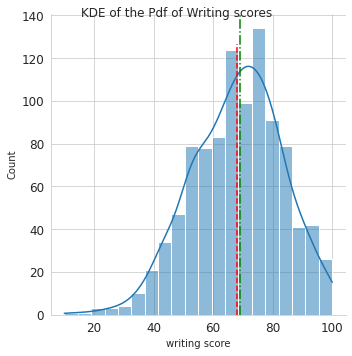

In [10]:
plot = sns.displot(data=df,x="writing score",kind ="hist",bins=20,  kde=True)
plot.fig.suptitle("KDE of the Pdf of Writing scores")
plt.axvline (df["writing score"].mean(), 0,0.9, color="r", linestyle="--")
plt.axvline(df["writing score"].median(), 0,1, color="g", linestyle="-.")
print("Red is mean and green is median")
diff= df["writing score"].mean() -df["writing score"].median()
print("Mean - Median =", round(diff,3))

In [11]:
numeric_melt = pd.melt(df[numeric], id_vars=None, value_vars=numeric)
numeric_melt.head()

,variable,value
0,math score,72
1,math score,69
2,math score,90
3,math score,47
4,math score,76


Text(0.5, 0.98, 'ECDF of all tests scores')

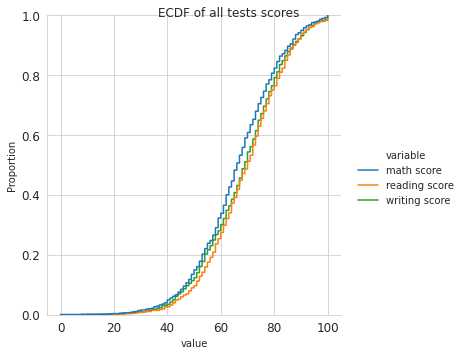

In [12]:
_= sns.displot(data=numeric_melt,x="value",kind ="ecdf",hue="variable")
_.fig.suptitle("ECDF of all tests scores")

All 3 distributions seem normal. 


Low skew values , median and mean overlap.


All similar ECDF. Closer to normal. 

There seems to be a bit of a lower then normal concentration on low scores -> I believe it is  because math has a min of 0 scores. I'll test all for outliers.    

First let's check for normality.

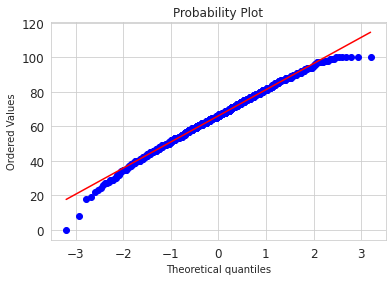

In [13]:
from scipy.stats import probplot
import matplotlib.pyplot as plt

probplot(df["math score"], plot=plt)
plt.show()

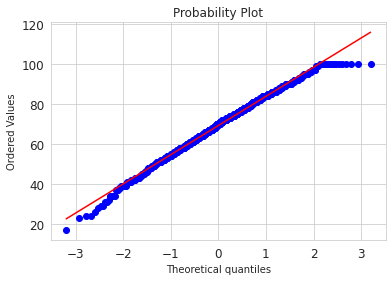

In [14]:
probplot(df["reading score"], plot=plt)
plt.show()

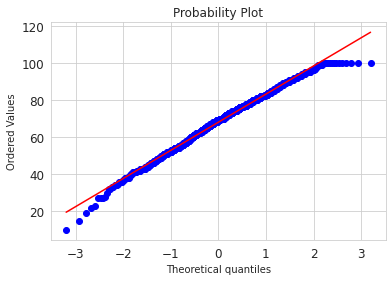

In [15]:
probplot(df["writing score"], plot=plt)
plt.show()

Not expecting the values (dots in blue) after 2 std from mean to be aligned with the red, because values maxed out at 100. 

But the values at the lower end should have a better fit.

If those are not outliers then distribution is not normal.

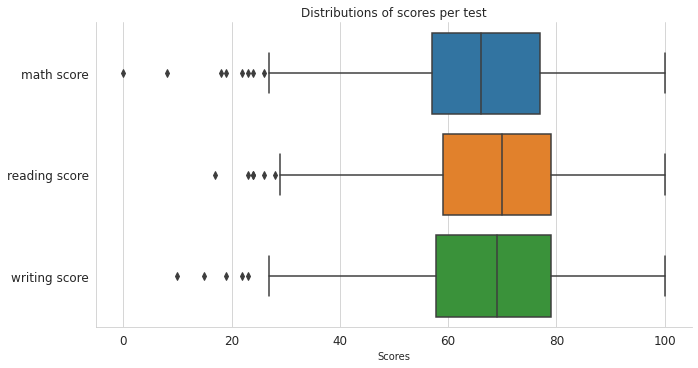

In [16]:
plot= sns.catplot(data=numeric_melt, x="value", y= "variable", kind="box", orient="h", aspect=2)
plot.set(ylabel ="" , xlabel ="Scores" ,title="Distributions of scores per test")


According to Turkey's method values within 1.5*IQR anf 3*IQR from the mean are possible outliers (this rage is known as inner fance). 

Values away from the mean by more then 3*IQR are considered probable outliers.

In [17]:
# math 

q1m = df["math score"].quantile(0.25)
q3m = df["math score"].quantile(0.75)
iqrm = q3m-q1m
minm = q1m-1.5*iqrm

# reading 

q1r = df["reading score"].quantile(0.25)
q3r = df["reading score"].quantile(0.75)
iqrr= q3r-q1r
minr = q1r-1.5*iqrr

# writing 

q1w = df["writing score"].quantile(0.25)
q3w = df["writing score"].quantile(0.75)
iqrw = q3w-q1w
minw = q1w-1.5*iqrw
min = [minm,minr,minw]

print("Probable outliers: ")
for var in range(0,3) :
  print( "min value for {} is  {} and there are {} of them  ".format(numeric[var],round(min[var],3),len(df[df[numeric[var]] < min[var]  ])))



Probable outliers: 
min value for math score is  27.0 and there are 8 of them  
min value for reading score is  29.0 and there are 6 of them  
min value for writing score is  25.875 and there are 5 of them  


In [18]:
df["math score"].mean() -15*3


21.089

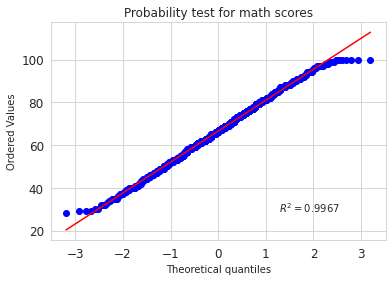

In [19]:
test_ = df[df["math score"]>27.0 ]
probplot(test_["math score"], plot=plt,rvalue=True)
plt.title("Probability test for math scores")
plt.show()

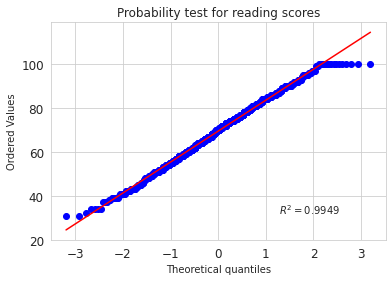

In [20]:
test_ = df[df["reading score"]>29.0]
probplot(test_["reading score"], plot=plt, rvalue=True)
plt.title("Probability test for reading scores")
plt.show()

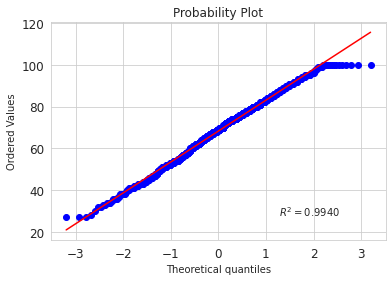

In [21]:
test_ = df[df["writing score"]>25.875]
probplot(test_["writing score"], plot=plt, rvalue=True)

plt.show()

By eliminating those outliers I'll clean 0.19 % of the data. I don't mind that.

It is reasonable to use mean as central tendency: 
* Reading = 69.169
* Writing = 68.054 
* math = 66.085

Modes tell a different story (1 bin= range /20 ):
* Mode for Writing = [73-77.5]
* Mode for Reading = [70.95- 75.1]
* Mode for math = [65,70]

Variablity -> standadrd deviation :
* writing= 15.19
* math = 15.16
* reading = 14

Low  skew + All means differ by less then 1 point from median. 

Next let's check the explanatory variables

# Explanatory variables

In [22]:
for var in categorical : 
  print(df[var].value_counts(dropna=False) / 1000)

female    0.518
male      0.482
Name: gender, dtype: float64
group C    0.319
group D    0.262
group B    0.190
group E    0.140
group A    0.089
Name: race/ethnicity, dtype: float64
some college          0.226
associate's degree    0.222
high school           0.196
some high school      0.179
bachelor's degree     0.118
master's degree       0.059
Name: parental level of education, dtype: float64
standard        0.645
free/reduced    0.355
Name: lunch, dtype: float64
none         0.642
completed    0.358
Name: test preparation course, dtype: float64


 * 51 % are female students 
 
 * 58 % of students are ethier of race C or D
 
 * most parents have some college or associate degree. Only 6% have a Master's


* Most students have standard lunch plan

* Almost 2 thirds finnish prep course

Most important :

* No null values 
 




In [23]:
melted_cat = pd.melt(df[categorical], value_vars=categorical)
melted_cat.head()

,variable,value
0,gender,female
1,gender,female
2,gender,female
3,gender,male
4,gender,male


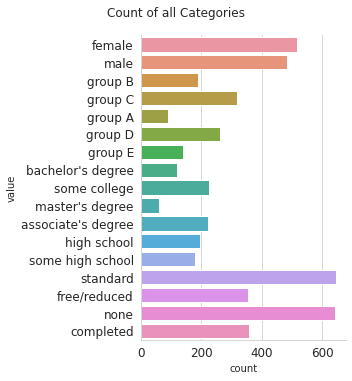

In [24]:

plot = sns.catplot(data=melted_cat, y="value", orient="h", kind="count" )
plot.fig.suptitle("Count of all Categories", y=1.05)
plot.set_axis_labels(x="Categories", y= "Count")

Before moving on I'll do some transformations. 

Data is clean and organize. 

I'll change the names of columns to allow for calling a column using just a dot.

I'll give the proper dtype to object (as a matter of memory saving habbit, althoug we don't need it ). 

Also change the name of categories to shorter ones without spaces. 




# Transformations


In [25]:
df.columns = ['gender', 'race', 'par_edu', 'lunch',
       'prep_course', 'math', 'reading', 'writing']
df.head()

,gender,race,par_edu,lunch,prep_course,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [26]:
categorical = [var for var in df.columns if df[var].dtype=='O']
numeric = [var for var in df.columns if df[var].dtype=="int"]

In [27]:
df.race.nbytes

8000

In [28]:
for var in categorical : 
  df[var] = pd.Categorical(df[var])

In [29]:
df.race.nbytes

1040

In [30]:
map = {'group A':'A','group B':'B','group C':'C','group D':'D','group E':'E' }
df.race=df.race.cat.rename_categories(new_categories= map)
df.race.unique()

['B', 'C', 'A', 'D', 'E']
Categories (5, object): ['B', 'C', 'A', 'D', 'E']

In [31]:
map = {'female':'F','male':'M'}
df.gender=df.gender.cat.rename_categories(new_categories= map)
df.gender.unique()

['F', 'M']
Categories (2, object): ['F', 'M']

In [32]:
df.par_edu.unique()

['bachelor's degree', 'some college', 'master's degree', 'associate's degree', 'high school', 'some high school']
Categories (6, object): ['bachelor's degree', 'some college', 'master's degree', 'associate's degree',
                         'high school', 'some high school']

In [33]:
map = {"bachelor's degree": "Bach",
       'some college': "College", 
       "master's degree": "Master", 
       "associate's degree":"Associate", 
       'high school':"HighSchool", 
       'some high school':"SomeHighSchool"}
df.par_edu=df.par_edu.replace( map)


df.par_edu.unique()

array(['Bach', 'College', 'Master', 'Associate', 'HighSchool',
       'SomeHighSchool'], dtype=object)

In [34]:
par_edu_order= ['SomeHighSchool','HighSchool','Associate','Bach', 'College', 'Master']
df["par_edu"] = pd.Categorical(df.par_edu,categories = par_edu_order, ordered=True) 
df.par_edu.unique()

['Bach', 'College', 'Master', 'Associate', 'HighSchool', 'SomeHighSchool']
Categories (6, object): ['SomeHighSchool' < 'HighSchool' < 'Associate' < 'Bach' < 'College' < 'Master']

I'll add a Letter Grade so I can make an alternative model. 


In [35]:
labels=["F", "D-","D","D+","C-","C","C+","B-","B","B+","A-","A"]
for var in numeric:
  col = var + "_grade"
  df[col] = pd.cut(df[var], bins=[0,59,62,66,69,72,76,79,82,86,89,92,100],labels=labels) 
  df[col] = pd.Categorical(df[col],categories=labels ,ordered=True)

df.head()

,gender,race,par_edu,lunch,prep_course,math,reading,writing,math_grade,reading_grade,writing_grade
0,F,B,Bach,standard,none,72,72,74,C-,C-,C
1,F,C,College,standard,completed,69,90,88,D+,A-,B+
2,F,B,Master,standard,none,90,95,93,A-,A,A
3,M,A,Associate,free/reduced,none,47,57,44,F,F,F
4,M,C,College,standard,none,76,78,75,C,C+,C


Drop outliers

In [36]:
out= df.query('reading <29 | writing <25.875 | math <27')
out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 17 to 980
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   gender         12 non-null     category
 1   race           12 non-null     category
 2   par_edu        12 non-null     category
 3   lunch          12 non-null     category
 4   prep_course    12 non-null     category
 5   math           12 non-null     int64   
 6   reading        12 non-null     int64   
 7   writing        12 non-null     int64   
 8   math_grade     11 non-null     category
 9   reading_grade  12 non-null     category
 10  writing_grade  12 non-null     category
dtypes: category(8), int64(3)
memory usage: 2.4 KB


In [37]:
df= df.query('reading >29 & writing >25.875 & math >27')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 0 to 999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   gender         984 non-null    category
 1   race           984 non-null    category
 2   par_edu        984 non-null    category
 3   lunch          984 non-null    category
 4   prep_course    984 non-null    category
 5   math           984 non-null    int64   
 6   reading        984 non-null    int64   
 7   writing        984 non-null    int64   
 8   math_grade     984 non-null    category
 9   reading_grade  984 non-null    category
 10  writing_grade  984 non-null    category
dtypes: category(8), int64(3)
memory usage: 40.3 KB


# Explanatory vs dependents

### Gender

Lines represent mean: Blue = F and Orange = M 


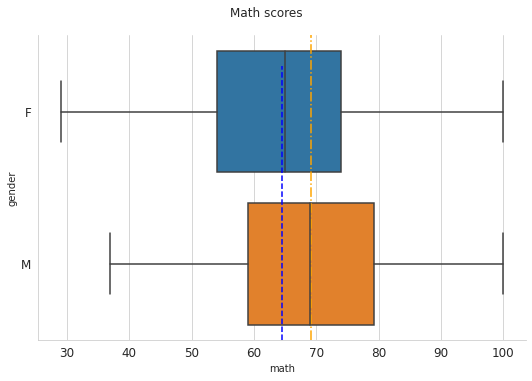

In [38]:
plot= sns.catplot(data=df, y="gender", x="math", kind="box",orient="h",aspect =1.5)
plot.fig.suptitle("Math scores", y=1.05)
plt.axvline (df.query('gender=="F"')["math"].mean(), 0,0.9, color="b", linestyle="--")
plt.axvline(df.query('gender=="M"')["math"].mean(), 0,9, color="orange", linestyle="-.")
print("Lines represent mean: Blue = F and Orange = M ")

Lines represent mean: Blue = F and Orange = M 


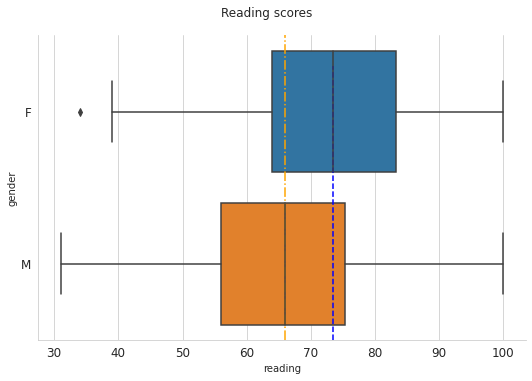

In [39]:
plot= sns.catplot(data=df, y="gender", x="reading", kind="box",orient="h",aspect =1.5)
plot.fig.suptitle("Reading scores", y=1.05)
plt.axvline (df.query('gender=="F"')["reading"].mean(), 0,0.9, color="b", linestyle="--")
plt.axvline(df.query('gender=="M"')["reading"].mean(), 0,9, color="orange", linestyle="-.")
print("Lines represent mean: Blue = F and Orange = M ")

Lines represent mean: Blue = F and Orange = M 


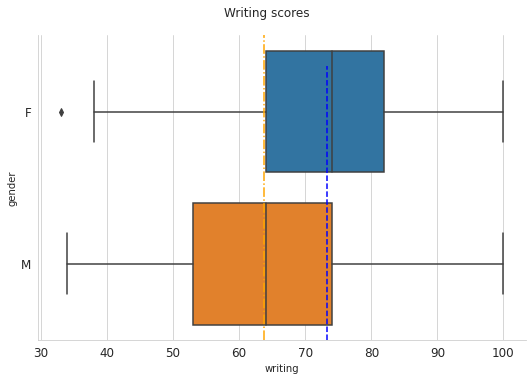

In [40]:
plot= sns.catplot(data=df, y="gender", x="writing", kind="box",orient="h",aspect =1.5)
plot.fig.suptitle("Writing scores", y=1.05)
plt.axvline (df.query('gender=="F"')["writing"].mean(), 0,0.9, color="b", linestyle="--")
plt.axvline(df.query('gender=="M"')["writing"].mean(), 0,9, color="orange", linestyle="-.")
print("Lines represent mean: Blue = F and Orange = M ")

Males are only bettter at math (w/ higher min,Q1,median & Q3)


Females students dominate over male in reading and writting. We'll see it better when calculating effect. 

### Race

In [41]:

print("Don't forget each race is represented differently (%):")
print(df["race"].value_counts(dropna=False) / 10)

Don't forget each race is represented differently (%):
C    31.4
D    26.0
B    18.3
E    13.9
A     8.8
Name: race, dtype: float64


Each lines represents a mean
Students from races B and C have similar mean at 65.01


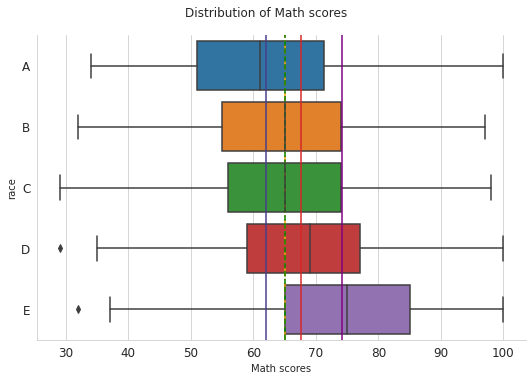

In [42]:
plot= sns.catplot(data=df, y="race", x="math", kind="box",orient="h",aspect =1.5)
plot.fig.suptitle("Distribution of Math scores", y=1.05)
plt.axvline (df.query('race=="A"')["math"].mean(), 0,1, color="darkslateblue", linestyle="-")
plt.axvline(df.query('race=="B"')["math"].mean(), 0,9, color="orange", linestyle="-.")
plt.axvline(df.query('race=="C"')["math"].mean(), 0,9, color="g", linestyle="--")
plt.axvline(df.query('race=="D"')["math"].mean(), 0,9, color="tab:red", linestyle="-")
plt.axvline(df.query('race=="E"')["math"].mean(), 0,9, color="purple", linestyle="-")
plt.xlabel("Math scores")
print("Each lines represents a mean")
print("Students from races B and C have similar mean at 65.01")

Each lines represents a mean


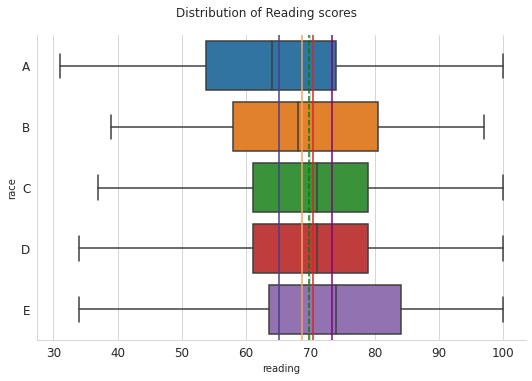

In [43]:
plot= sns.catplot(data=df, y="race", x="reading", kind="box",orient="h",aspect =1.5)
plot.fig.suptitle("Distribution of Reading scores", y=1.05)
plt.axvline (df.query('race=="A"')["reading"].mean(), 0,1, color="darkslateblue", linestyle="-")
plt.axvline(df.query('race=="B"')["reading"].mean(), 0,9, color="sandybrown", linestyle="-")
plt.axvline(df.query('race=="C"')["reading"].mean(), 0,9, color="g", linestyle="--")
plt.axvline(df.query('race=="D"')["reading"].mean(), 0,9, color="tab:red", linestyle="-")
plt.axvline(df.query('race=="E"')["reading"].mean(), 0,9, color="purple", linestyle="-")
print("Each lines represents a mean")


Each lines represents a mean


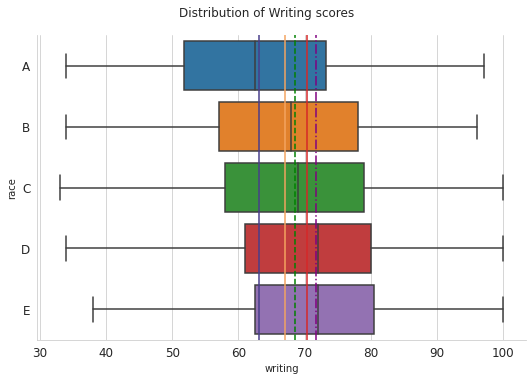

In [44]:
plot= sns.catplot(data=df, y="race", x="writing", kind="box",orient="h",aspect =1.5)
plot.fig.suptitle("Distribution of Writing scores", y=1.05)
plt.axvline (df.query('race=="A"')["writing"].mean(), 0,1, color="darkslateblue", linestyle="-")
plt.axvline(df.query('race=="B"')["writing"].mean(), 0,9, color="sandybrown", linestyle="-")
plt.axvline(df.query('race=="C"')["writing"].mean(), 0,9, color="g", linestyle="--")
plt.axvline(df.query('race=="D"')["writing"].mean(), 0,9, color="tab:red", linestyle="-")
plt.axvline(df.query('race=="E"')["writing"].mean(), 0,9, color="purple", linestyle="-.")
print("Each lines represents a mean")


The least reresented races snatched the worst and best. Race E performs better at every test and A is the worst (and least represented at 8.8%)

The others fell to the old "Regression to the mean" rule.

Race D outperforming B and D at every test. 



### Parents education

In [45]:
print("Don't forget each category is represented differently (%):")
print(df["par_edu"].value_counts(dropna=False) / 10)

Don't forget each category is represented differently (%):
College           22.2
Associate         22.1
HighSchool        19.0
SomeHighSchool    17.4
Bach              11.8
Master             5.9
Name: par_edu, dtype: float64


In [46]:
df.query('par_edu == "Bach" ').math.mean()

69.38983050847457

Each lines represents a mean
Sudents whom parents have a Bachelor or Master's overlap at arround 69


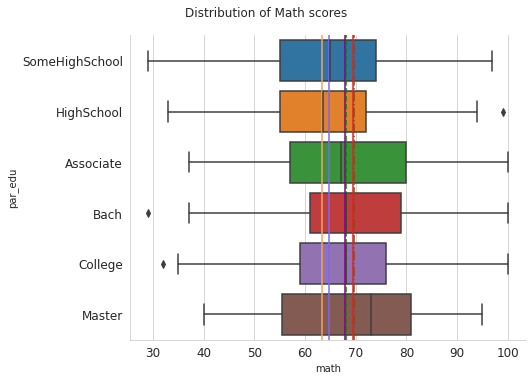

In [47]:
plot= sns.catplot(data=df, y="par_edu", x="math", kind="box",orient="h",aspect =1.5)
plot.fig.suptitle("Distribution of Math scores", y=1.05)
plt.axvline (df.query('par_edu=="Master"')["math"].mean(), 0,1, color="saddlebrown", linestyle="-.")
plt.axvline(df.query('par_edu=="College"')["math"].mean(), 0,9, color="purple", linestyle="-")
plt.axvline(df.query('par_edu=="Associate"')["math"].mean(), 0,9, color="g", linestyle="--")
plt.axvline(df.query('par_edu=="HighSchool"')["math"].mean(), 0,9, color="sandybrown", linestyle="-")
plt.axvline(df.query('par_edu=="SomeHighSchool"')["math"].mean(), 0,9, color="mediumslateblue", linestyle="-")
plt.axvline(df.query('par_edu=="Bach"')["math"].mean(), 0,9, color="tab:red", linestyle="-")
print("Each lines represents a mean")
print("Sudents whom parents have a Bachelor or Master's overlap at arround 69")

Each lines represents a mean


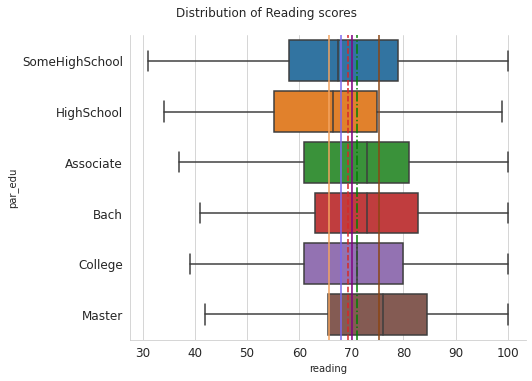

In [48]:
plot= sns.catplot(data=df, y="par_edu", x="reading", kind="box",orient="h",aspect =1.5)
plot.fig.suptitle("Distribution of Reading scores", y=1.05)
plt.axvline (df.query('par_edu=="Master"')["reading"].mean(), 0,1, color="saddlebrown", linestyle="-")
plt.axvline(df.query('par_edu=="College"')["reading"].mean(), 0,9, color="purple", linestyle="-")
plt.axvline(df.query('par_edu=="Associate"')["reading"].mean(), 0,9, color="g", linestyle="-.")
plt.axvline(df.query('par_edu=="HighSchool"')["reading"].mean(), 0,9, color="sandybrown", linestyle="-")
plt.axvline(df.query('par_edu=="SomeHighSchool"')["reading"].mean(), 0,9, color="mediumslateblue", linestyle="-")
plt.axvline(df.query('par_edu=="Bach"')["math"].mean(), 0,9, color="tab:red", linestyle="--")
print("Each lines represents a mean")

Each lines represents a mean


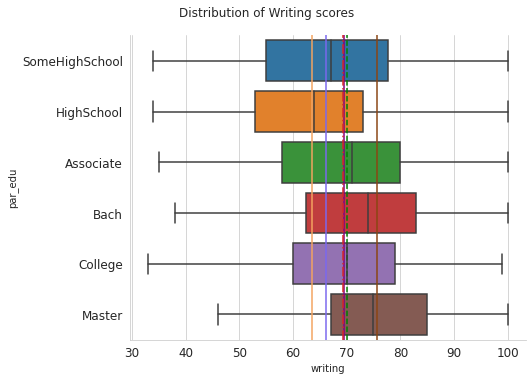

In [49]:
plot= sns.catplot(data=df, y="par_edu", x="writing", kind="box",orient="h",aspect =1.5)
plot.fig.suptitle("Distribution of Writing scores", y=1.05)
plt.axvline (df.query('par_edu=="Master"')["writing"].mean(), 0,1, color="saddlebrown", linestyle="-")
plt.axvline(df.query('par_edu=="College"')["writing"].mean(), 0,9, color="purple", linestyle="-")
plt.axvline(df.query('par_edu=="Associate"')["writing"].mean(), 0,9, color="g", linestyle="--")
plt.axvline(df.query('par_edu=="HighSchool"')["writing"].mean(), 0,9, color="sandybrown", linestyle="-")
plt.axvline(df.query('par_edu=="SomeHighSchool"')["writing"].mean(), 0,9, color="mediumslateblue", linestyle="-")
plt.axvline(df.query('par_edu=="Bach"')["math"].mean(), 0,9, color="tab:red", linestyle="-.")
print("Each lines represents a mean")

Having a parent with a Master can definitely yield the best grades. Even in math where mean is not the highest, we can see that Q1, median and Q3 are.

Parents with high school or some form of high school degree seem to have trouble with their kids grades.

### Lunch 

In [50]:
print("Don't forget each category is represented differently (%):")
print(df["lunch"].value_counts(dropna=False) / 10)

Don't forget each category is represented differently (%):
standard        64.2
free/reduced    34.2
Name: lunch, dtype: float64


Each lines represents a mean


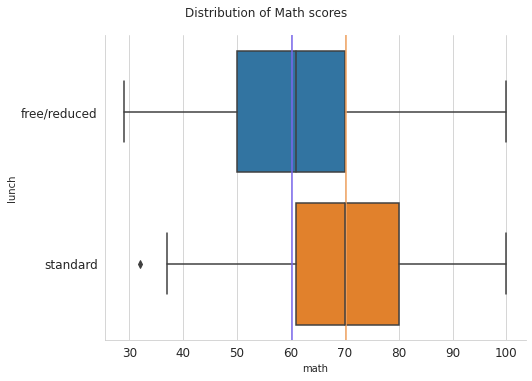

In [51]:
plot= sns.catplot(data=df, y="lunch", x="math", kind="box",orient="h",aspect =1.5)
plot.fig.suptitle("Distribution of Math scores", y=1.05)
plt.axvline (df.query('lunch=="standard"')["math"].mean(), 0,1, color="sandybrown", linestyle="-")
plt.axvline(df.query('lunch!="standard"')["math"].mean(), 0,9, color="mediumslateblue", linestyle="-")

print("Each lines represents a mean")

Each lines represents a mean


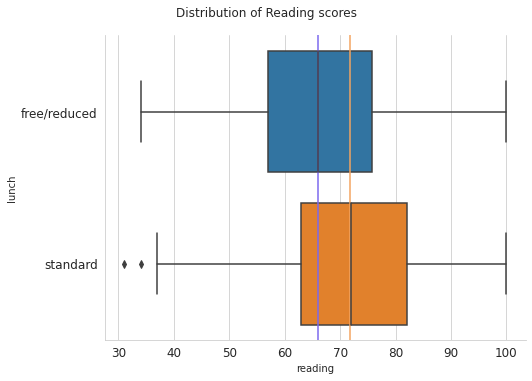

In [52]:
plot= sns.catplot(data=df, y="lunch", x="reading", kind="box",orient="h",aspect =1.5)
plot.fig.suptitle("Distribution of Reading scores", y=1.05)
plt.axvline (df.query('lunch=="standard"')["reading"].mean(), 0,1, color="sandybrown", linestyle="-")
plt.axvline(df.query('lunch!="standard"')["reading"].mean(), 0,9, color="mediumslateblue", linestyle="-")

print("Each lines represents a mean")

Each lines represents a mean


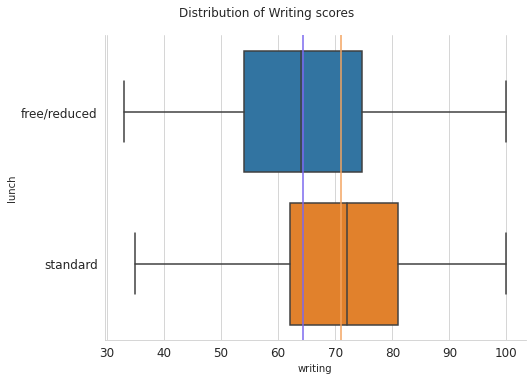

In [53]:
plot= sns.catplot(data=df, y="lunch", x="writing", kind="box",orient="h",aspect =1.5)
plot.fig.suptitle("Distribution of Writing scores", y=1.05)
plt.axvline (df.query('lunch=="standard"')["writing"].mean(), 0,1, color="sandybrown", linestyle="-")
plt.axvline(df.query('lunch!="standard"')["writing"].mean(), 0,9, color="mediumslateblue", linestyle="-")

print("Each lines represents a mean")

Parents who pay for their kids lunch in full, have kids with better grades

### Preparation course

In [54]:
print("Don't forget each category is represented differently (%):")
print(df["prep_course"].value_counts(dropna=False) / 10)

Don't forget each category is represented differently (%):
none         62.7
completed    35.7
Name: prep_course, dtype: float64


Each lines represents a mean


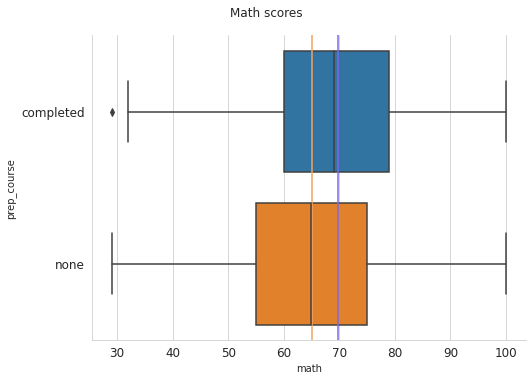

In [55]:
plot= sns.catplot(data=df, y="prep_course", x="math", kind="box",orient="h",aspect =1.5)
plot.fig.suptitle("Math scores", y=1.05)
plt.axvline (df.query('prep_course=="completed"')["math"].mean(), 0,1, color="mediumslateblue", linestyle="-")
plt.axvline(df.query('prep_course=="none"')["math"].mean(), 0,9, color="sandybrown", linestyle="-")

print("Each lines represents a mean")

Each lines represents a mean


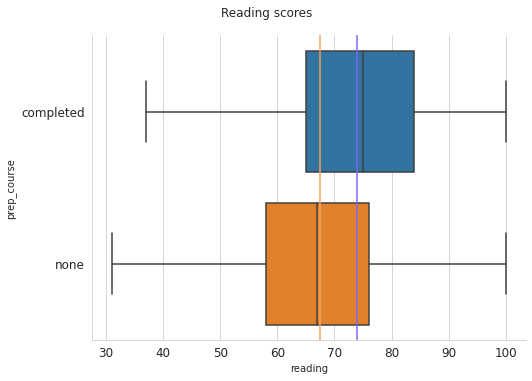

In [56]:
plot= sns.catplot(data=df, y="prep_course", x="reading", kind="box",orient="h",aspect =1.5)
plot.fig.suptitle("Reading scores", y=1.05)
plt.axvline (df.query('prep_course=="completed"')["reading"].mean(), 0,1, color="mediumslateblue", linestyle="-")
plt.axvline(df.query('prep_course=="none"')["reading"].mean(), 0,9, color="sandybrown", linestyle="-")

print("Each lines represents a mean")

Each lines represents a mean


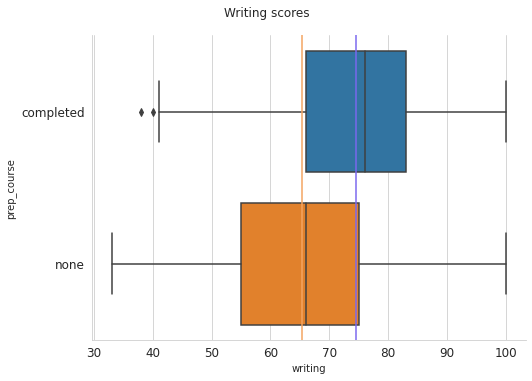

In [57]:
plot= sns.catplot(data=df, y="prep_course", x="writing", kind="box",orient="h",aspect =1.5)
plot.fig.suptitle("Writing scores", y=1.05)
plt.axvline (df.query('prep_course=="completed"')["writing"].mean(), 0,1, color="mediumslateblue", linestyle="-")
plt.axvline(df.query('prep_course=="none"')["writing"].mean(), 0,9, color="sandybrown", linestyle="-")

print("Each lines represents a mean")

You better complete the course

# Multivariate

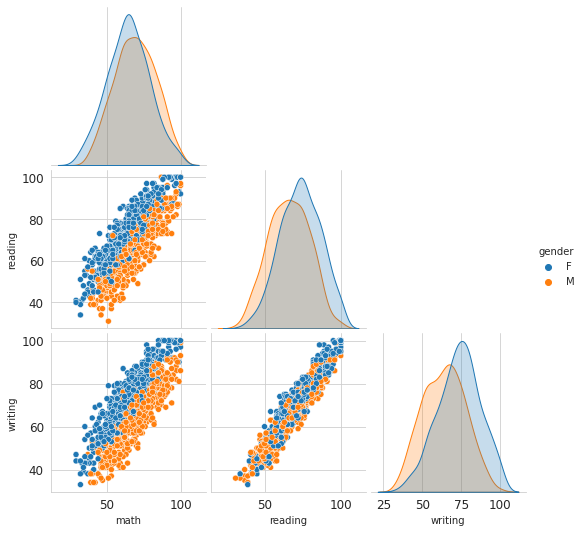

In [58]:
sns.pairplot(df, hue = "gender",corner=True)

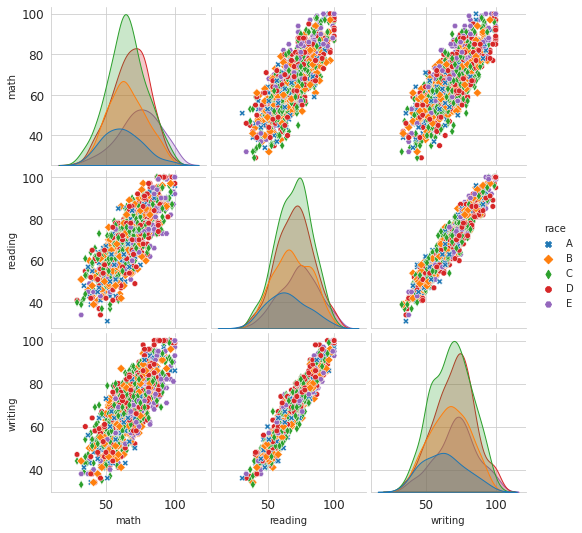

In [59]:
marker= {"A": "X", "B": "D","C":"d","E":"H","D":"8"}
sns.pairplot(df, hue = "race",markers=marker)

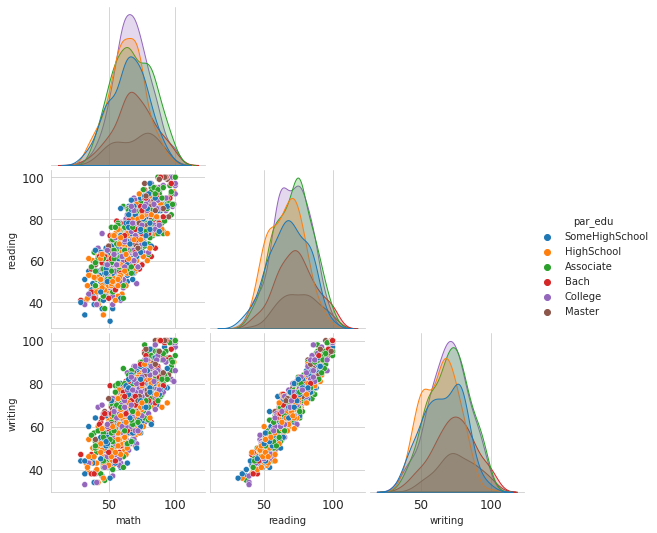

In [60]:
sns.pairplot(df, hue = "par_edu",corner=True)

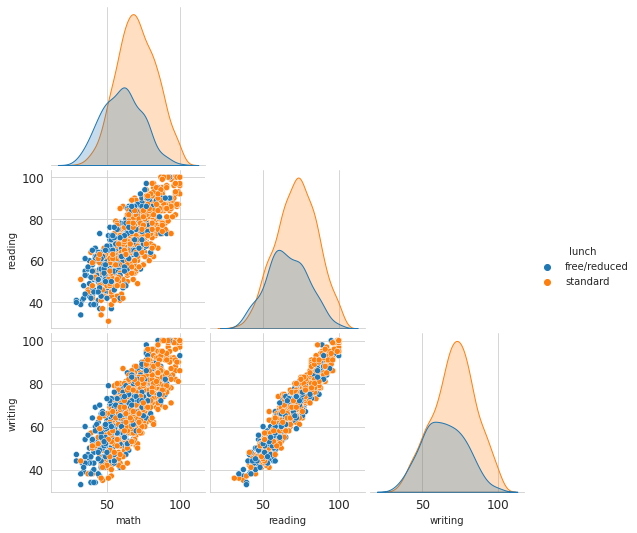

In [61]:
sns.pairplot(df, hue = "lunch",corner=True)

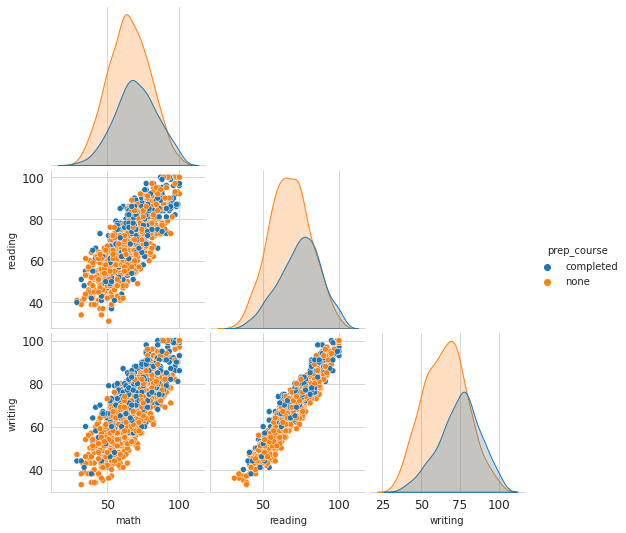

In [62]:
sns.pairplot(df, hue = "prep_course",corner=True)

One thing is clear knowing one test score can incrase the precision of any model. 

# Effects

I've made claims about effects between subsets. I'll put my code where my mouth is and test those hypothesis. 

## Is it safe to assume same equal variance?

I'll use bartlett test since the I'm asuming that the data is normal. *Although distribution of each subset may not.*


In [63]:
from scipy.stats import bartlett

In [64]:
gender_test = {}
for val in numeric :
  stat, p = bartlett(
    df.query('gender=="F"')[val],
    df.query('gender=="M"')[val])
  gender_test[val] = (stat,p)

gender_test

{'math': (0.6080360367450769, 0.43552823669780205),
 'reading': (0.00028056776470624826, 0.9866359331392477),
 'writing': (0.0500371047508989, 0.8229987213208919)}

In [65]:
race_test = {}
for val in numeric :
  stat, p = bartlett(
    df.query('race=="A"')[val],
    df.query('race=="B"')[val],
    df.query('race=="C"')[val],
    df.query('race=="D"')[val],
    df.query('race=="E"')[val])
  race_test[val] = (stat,p)

race_test



{'math': (3.504006274281631, 0.47726944320565745),
 'reading': (3.251489934813856, 0.5166548057988981),
 'writing': (0.7725204765651408, 0.9420936501696038)}

In [66]:
par_edu_test = {}
for val in numeric :
  stat, p = bartlett(
    df.query('par_edu=="SomeHighSchool"')[val],
    df.query('par_edu=="HighSchool"')[val],
    df.query('par_edu=="Associate"')[val],
    df.query('par_edu=="Bach"')[val],
    df.query('par_edu=="College"')[val],
    df.query('par_edu=="Master"')[val])
  par_edu_test[val] = (stat,p)

par_edu_test


{'math': (6.17271728539503, 0.28977377079245226),
 'reading': (2.7423462550409883, 0.7396345367657906),
 'writing': (3.6977438687430615, 0.5936997436736006)}

In [67]:
lunch_test = {}
for val in numeric :
  stat, p = bartlett(
    df.query('lunch=="standard"')[val],
    df.query('lunch!="standard"')[val])
  lunch_test[val] = (stat,p)

lunch_test

{'math': (0.16661316458656653, 0.6831395050374979),
 'reading': (0.012910065511187454, 0.909537074839245),
 'writing': (0.05751579344398516, 0.8104663086278244)}

In [68]:
prep_course_test = {}
for val in numeric :
  stat, p = bartlett(
    df.query('prep_course=="none"')[val],
    df.query('prep_course!="none"')[val])
  prep_course_test[val] = (stat,p)

prep_course_test

{'math': (0.20133927959041492, 0.6536419829771779),
 'reading': (0.05242421760282953, 0.8188973986010096),
 'writing': (1.1369656373964456, 0.2862944178206117)}

Its ok to compare subsets of math, reading and writing, within each category.

Still to note math has the highest difference in variance, apart from writing when comparing whether or not prep course was completed.

## How realible are the differences in mean?

I'll test difference in means between the whole data set and each subset.

Since I'm doing a 1-tail t-test if p-value <*0.05* ten I'll accept the difference.

If p-value > 0.95 then I'll accept that the difference is the other away (the subset mean is higher then dataset average).

In [70]:
from scipy.stats import ttest_ind

for val in numeric :
  ttest,pval = ttest_ind(df.query('gender=="F"')[val],df.query('gender!="F"')[val],alternative="greater",equal_var= True)
   
  diff = df.query('gender!="F"')[val].mean()-df.query('gender=="F"')[val].mean()
  print(val," = " ,"ttest:",round(ttest,3),"pval:",round(pval,3),"(",round(diff,3),")")


math  =  ttest: -5.246 pval: 1.0 ( 4.704 )
reading  =  ttest: 8.753 pval: 0.0 ( -7.442 )
writing  =  ttest: 11.016 pval: 0.0 ( -9.522 )


It is safe to say that in this dataset female students tend to perform better then Male students at both reading and writing and male students tend to perform better at math.

In [71]:
for val in numeric :
  for cat in list(df["gender"].unique()):
    ttest,pval = ttest_ind(df[val],df.loc[df["gender"]==cat,val],alternative="greater",equal_var= True)
     
    diff = df.loc[df["gender"]==cat,val].mean()-df[val].mean()
  
    print(val,cat," = " ,"ttest:",round(ttest,3),"pval:",round(pval,3),"(",round(diff,3),")")


math F  =  ttest: 2.921 pval: 0.002 ( -2.275 )
math M  =  ttest: -3.085 pval: 0.999 ( 2.428 )
reading F  =  ttest: -4.824 pval: 1.0 ( 3.6 )
reading M  =  ttest: 5.034 pval: 0.0 ( -3.842 )
writing F  =  ttest: -5.976 pval: 1.0 ( 4.606 )
writing M  =  ttest: 6.255 pval: 0.0 ( -4.916 )


Here we are comparing each subset with the average. Conclusions are still the same.

In [72]:
for val in numeric :
  for cat in list(df["race"].unique()):
    ttest,pval = ttest_ind(df[val],df.loc[df["race"]==cat,val],alternative="greater",equal_var= True)
    diff=df.loc[df["race"]==cat,val].mean()-df[val].mean()
    if pval <0.05:
      result  = "(lower)"
    elif pval>0.95:
      result ="(higher)"
    else :
      result ="(can't say)" 
    print(val,cat,result," = " ,"ttest:",round(ttest,3),"pval:",round(pval,3),"(",round(diff,3),")")

    

math B (can't say)  =  ttest: 1.548 pval: 0.061 ( -1.759 )
math C (lower)  =  ttest: 1.792 pval: 0.037 ( -1.645 )
math A (lower)  =  ttest: 3.008 pval: 0.001 ( -4.764 )
math D (can't say)  =  ttest: -0.92 pval: 0.821 ( 0.902 )
math E (higher)  =  ttest: -5.659 pval: 1.0 ( 7.361 )
reading B (can't say)  =  ttest: 1.005 pval: 0.158 ( -1.118 )
reading C (can't say)  =  ttest: 0.068 pval: 0.473 ( -0.06 )
reading A (lower)  =  ttest: 2.999 pval: 0.001 ( -4.648 )
reading D (can't say)  =  ttest: -0.545 pval: 0.707 ( 0.523 )
reading E (higher)  =  ttest: -2.835 pval: 0.998 ( 3.571 )
writing B (can't say)  =  ttest: 1.424 pval: 0.077 ( -1.637 )
writing C (can't say)  =  ttest: 0.263 pval: 0.396 ( -0.244 )
writing A (lower)  =  ttest: 3.464 pval: 0.0 ( -5.548 )
writing D (higher)  =  ttest: -1.702 pval: 0.955 ( 1.697 )
writing E (higher)  =  ttest: -2.336 pval: 0.99 ( 3.044 )


I'm confident to say that group A performs worst then average at every test.

Group E performs better then average at every test.

We can't draw conclusions for comparison between groups B or C and whole dataset.

For group D is only safe to say that they perform better then average at writing (by a thin margin.)

In [73]:
for val in numeric :
  for cat in list(df["par_edu"].unique()):
    ttest,pval = ttest_ind(df[val],df.loc[df["par_edu"]==cat,val],alternative="greater",equal_var= True)
    diff = df.loc[df["par_edu"]==cat,val].mean()-df[val].mean()
    if pval <0.05:
      result  = "(lower)"
    elif pval>0.95:
      result ="(higher)"
    else :
      result ="(can't say)" 
    print(val,cat,result," = " ,"ttest:",round(ttest,3),"pval:",round(pval,3),"(",round(diff,3),")")

math Bach (higher)  =  ttest: -1.874 pval: 0.969 ( 2.614 )
math College (can't say)  =  ttest: -1.046 pval: 0.852 ( 1.094 )
math Master (can't say)  =  ttest: -1.55 pval: 0.939 ( 2.97 )
math Associate (can't say)  =  ttest: -1.213 pval: 0.887 ( 1.297 )
math HighSchool (lower)  =  ttest: 3.123 pval: 0.001 ( -3.481 )
math SomeHighSchool (lower)  =  ttest: 1.728 pval: 0.042 ( -2.023 )
reading Bach (higher)  =  ttest: -2.37 pval: 0.991 ( 3.204 )
reading College (can't say)  =  ttest: -0.333 pval: 0.63 ( 0.339 )
reading Master (higher)  =  ttest: -3.009 pval: 0.999 ( 5.577 )
reading Associate (can't say)  =  ttest: -1.278 pval: 0.899 ( 1.313 )
reading HighSchool (lower)  =  ttest: 3.704 pval: 0.0 ( -4.017 )
reading SomeHighSchool (can't say)  =  ttest: 1.556 pval: 0.06 ( -1.778 )
writing Bach (higher)  =  ttest: -3.325 pval: 1.0 ( 4.663 )
writing College (can't say)  =  ttest: -0.812 pval: 0.791 ( 0.863 )
writing Master (higher)  =  ttest: -3.625 pval: 1.0 ( 6.959 )
writing Associate (can't

It is safe to say parents w/ Bachelor's degree have kids with higher grades then average. The same is valid for parents w/Master's in writing and reading tests.

And that parents with high school diplomas or similar have kids with lower grades then average, in this sample. 

Although reading score for kids whose parents have Some High school diploma was inconclusive with a p-value of 0.05.

In [74]:
for val in numeric :
  for cat in list(df["prep_course"].unique()):
    ttest,pval = ttest_ind(df[val],df.loc[df["prep_course"]==cat,val],alternative="greater",equal_var= True)
    diff = df.loc[df["prep_course"]==cat,val].mean()-df[val].mean()
    if pval <0.05:
      result  = "(lower)"
    elif pval>0.95:
      result ="(higher)"
    else :
      result ="(can't say)" 
    print(val,cat,result," = " ,"ttest:",round(ttest,3),"pval:",round(pval,3),"(",round(diff,3),")")

math none (lower)  =  ttest: 2.406 pval: 0.008 ( -1.737 )
math completed (higher)  =  ttest: -3.466 pval: 1.0 ( 3.051 )
reading none (lower)  =  ttest: 3.408 pval: 0.0 ( -2.381 )
reading completed (higher)  =  ttest: -4.919 pval: 1.0 ( 4.182 )
writing none (lower)  =  ttest: 4.561 pval: 0.0 ( -3.307 )
writing completed (higher)  =  ttest: -6.682 pval: 1.0 ( 5.808 )


In [75]:
print("Students that completed the prep course are better then average, but are they better then the others?")
for val in numeric :
  ttest,pval = ttest_ind(df.query('prep_course=="none"')[val],df.query('prep_course!="none"')[val],
                         alternative="greater",equal_var= True)
  diff = df.query('prep_course!="none"')[val].mean()-df.query('prep_course=="none"')[val].mean()
  if pval <0.05:
    result  = "(lower)"
  elif pval>0.95:
    result ="(higher)"
  else :
    result ="(can't say)" 
  print(val,cat,result," = " ,"ttest:",round(ttest,3),"pval:",round(pval,3),"(",round(diff,3),")")


Students that completed the prep course are better then average, but are they better then the others?
math completed (higher)  =  ttest: -5.135 pval: 1.0 ( 4.788 )
reading completed (higher)  =  ttest: -7.347 pval: 1.0 ( 6.563 )
writing completed (higher)  =  ttest: -10.051 pval: 1.0 ( 9.115 )


There are only 2 categories none or completed. We don't know if a student that didn’t completed, as at least started. 

But we can assume 2 things; inside this dataset, students who completed perform better then average and better then students who didn't.

We can also see that completing the prep course helps a lot in writing test, with students completing it scoring, on average +9.115.

In [76]:
for val in numeric :
  for cat in list(df["lunch"].unique()):
    ttest,pval = ttest_ind(df[val],df.loc[df["lunch"]==cat,val],alternative="greater",equal_var= True)
    diff = df.loc[df["lunch"]==cat,val].mean()-df[val].mean()
    if pval <0.05:
      result  = "(lower)"
    elif pval>0.95:
      result ="(higher)"
    else :
      result ="(can't say)" 
    print(val,cat,result," = " ,"ttest:",round(ttest,3),"pval:",round(pval,3),"(",round(diff,3),")")




math standard (higher)  =  ttest: -4.915 pval: 1.0 ( 3.464 )
math free/reduced (lower)  =  ttest: 7.358 pval: 0.0 ( -6.503 )
reading standard (higher)  =  ttest: -2.941 pval: 0.998 ( 2.049 )
reading free/reduced (lower)  =  ttest: 4.456 pval: 0.0 ( -3.845 )
writing standard (higher)  =  ttest: -3.19 pval: 0.999 ( 2.305 )
writing free/reduced (lower)  =  ttest: 4.84 pval: 0.0 ( -4.327 )


Paying for your kids meal in total grants him better chance to outperform the other students, if he goes to this school.

*Obviously, that's not the case, free/reduce meals are probably related with income, and income is correlated with almost everything in the world.*

In [77]:
print("Parents education for kids with standard lunch:")
print(df.query('lunch == "standard"')["par_edu"].value_counts(normalize=True))
print("Parents education for kids with free/reduce lunch:")
print(df.query('lunch != "standard"')["par_edu"].value_counts(normalize=True))


Parents education for kids with standard lunch:
College           0.227414
Associate         0.225857
HighSchool        0.194704
SomeHighSchool    0.182243
Bach              0.115265
Master            0.054517
Name: par_edu, dtype: float64
Parents education for kids with free/reduce lunch:
College           0.222222
Associate         0.222222
HighSchool        0.190058
SomeHighSchool    0.166667
Bach              0.128655
Master            0.070175
Name: par_edu, dtype: float64


I was expecting parents education to be correlated with income and that correlated with lunch variable. 

Parents education does not indicate if lunch is free or reduced.

Does not matter. In this scenario I wouldn't get access to parents income. All we care is whether the lunch is standard or not, because that's all the info we have.

## Slub model.

I will use just a simple model to predict high and low sores with just the information from exploration.

Exploration tells us that the best students are :

- Female (Male for math)
- Belong to race E
- Their parents have a Mater's degree(Bachelor's for math)
- They have completed the preparation course
- And their lunch plan is standard.

Exploration also tells us about the worst students:

- Male (Female for math)
- Belong to race A
- Their parents have a High School diploma
- They didn't complete the preparation course
- And their lunch plan is free/reduced.

In [78]:
best_math = df.query('gender =="M" & race=="E" & par_edu=="Bach" & prep_course=="completed" & lunch =="standard" ')
best_math

,gender,race,par_edu,lunch,prep_course,math,reading,writing,math_grade,reading_grade,writing_grade
476,M,E,Bach,standard,completed,76,62,66,C,D-,D
538,M,E,Bach,standard,completed,85,66,71,B,D,C-
909,M,E,Bach,standard,completed,70,64,70,C-,D,C-
916,M,E,Bach,standard,completed,100,100,100,A,A,A


In [79]:
best = df.query('gender =="F" & race=="E" & par_edu=="Master" & prep_course=="completed" & lunch =="standard" ')
best

,gender,race,par_edu,lunch,prep_course,math,reading,writing,math_grade,reading_grade,writing_grade
685,F,E,Master,standard,completed,94,99,100,A,A,A
995,F,E,Master,standard,completed,88,99,95,B+,A,A


In [80]:
worse_math = df.query('gender =="F" & race=="A" & par_edu=="HighSchool" & prep_course=="none" & lunch !="standard" ')
worse_math

,gender,race,par_edu,lunch,prep_course,math,reading,writing,math_grade,reading_grade,writing_grade


In [81]:
worse = df.query('gender =="M" & race=="A" & par_edu=="HighSchool" & prep_course=="none" & lunch !="standard" ')
worse

,gender,race,par_edu,lunch,prep_course,math,reading,writing,math_grade,reading_grade,writing_grade
395,M,A,HighSchool,free/reduced,none,48,45,41,F,F,F
688,M,A,HighSchool,free/reduced,none,53,58,44,F,F,F
811,M,A,HighSchool,free/reduced,none,45,47,49,F,F,F


This did not help at all. While trying to get the best math students we got one with 70 and another with 76.

We were bad at picking worse students also.

Plus these are very few students. These would not help predict students score for next year or give insight on how to improve school services.

Also I can't evaluate this model.

# Model

You probably didn't notice but I was testing this data in preparation for this part.

- First I tested for normality
- Second I took care of outliers.
- Third for Homoscedasticity (if I can or not assume that the difference in variance is small enough that allow me to compare samples assuming that they are drawn from the same distribution)
- In "Multivariable" section I visually tested linearity.
- And I’m assuming independence based on the sampling process where each row is a student.

I'm trying to predict a float between 0 and 100. 

I'll use Ordinary least squares method. Or better I'll use `ols` function from `statsmodels` library.

I'll use this function `SummarizeResults` from [Think Stats by Allen B. Downey, published by O'Reilly Media](https://https://www.greenteapress.com/thinkstats/#:~:text=Think%20Stats%20is%20an%20introduction%20to%20Probability%20and,to%20work%20on%20a%20project%20with%20real%20datasets.) . I just add p_value for all metrics inside “()”

In [82]:
import statsmodels.formula.api as smf

def SummarizeResults(results):
    """Prints the most important parts of linear regression results:

    results: RegressionResults object
    """
    f_pvalue = results.f_pvalue
    for name, param in results.params.items():
        pvalue = results.pvalues[name]
        print('%s   %0.3g   (%.3g)' % (name, param, pvalue))

    try:
        print('R^2 %.4g  (%.3g)' % (results.rsquared,f_pvalue))
        ys = results.model.endog
        print('Std(ys) %.4g' % ys.std())
        print('Std(res) %.4g' % results.resid.std())
    except AttributeError:
        print('R^2 %.4g' % results.prsquared)


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Math

### Predict score using Ordinary least square

In [83]:
np.random.seed(42)
mask = np.random.rand(len(df)) < 0.8
df_train = df[mask]
df_test = df[~mask]
print('Training data set length='+str(len(df_train)))
print('Testing data set length='+str(len(df_test)))
                           

Training data set length=788
Testing data set length=196


In [84]:
x_test= df_test[categorical]

In [85]:
#left is the variable I want predict
formula = 'math ~ C(gender)+ C(race)+C(par_edu)+C(lunch)+C(prep_course)'
model = smf.ols(formula, data=df_train)
results = model.fit()

SummarizeResults(results)

Intercept   53   (6.56e-119)
C(gender)[T.M]   5.32   (4.98e-09)
C(race)[T.B]   3.99   (0.0227)
C(race)[T.C]   4.07   (0.0124)
C(race)[T.D]   6.36   (0.000123)
C(race)[T.E]   11.4   (2.14e-09)
C(par_edu)[T.HighSchool]   -0.584   (0.692)
C(par_edu)[T.Associate]   3.66   (0.0118)
C(par_edu)[T.Bach]   6.51   (0.000101)
C(par_edu)[T.College]   3.34   (0.0184)
C(par_edu)[T.Master]   6.59   (0.00174)
C(lunch)[T.standard]   9.4   (4.08e-22)
C(prep_course)[T.none]   -4.53   (1.66e-06)
R^2 0.2396  (5.03e-39)
Std(ys) 14.27
Std(res) 12.45


In [86]:

df_test["math_predictions"] =results.predict(x_test)
df_test["residual"] = df_test.math_predictions-df_test.math
df_test["residual"].std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


12.580038685851466

My predictions have a RMSE (rooth mean squared error) of 12.58

Now I'll try to predict the grades instead of scores. 

### Predict grades using poisson

In [87]:
map= {'C-':5 , 'D+':4 ,
                              'A-':11 ,
                              'F' :1 ,
                              'C':6, 
                              'B+':10, 
                              'D':3, 
                              'C+':7, 
                              'D-':2, 
                              'A':12, 
                              'B-':8, 
                              'B':9}


df_train["math_grade_int"] = df.math_grade
df_train["math_grade_int"].replace(map,inplace=True)
df_test["math_grade_int"] = df.math_grade
df_test["math_grade_int"].replace(map,inplace=True)




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

In [88]:
formula = 'math_grade_int ~ C(gender)+ C(race)+C(par_edu)+C(lunch)+C(prep_course)'
model = smf.poisson(formula, data=df_train)
results = model.fit()
print(results.summary())


Optimization terminated successfully.
         Current function value: 2.497356
         Iterations 5
                          Poisson Regression Results                          
Dep. Variable:         math_grade_int   No. Observations:                  788
Model:                        Poisson   Df Residuals:                      775
Method:                           MLE   Df Model:                           12
Date:                Thu, 23 Dec 2021   Pseudo R-squ.:                 0.09945
Time:                        16:29:34   Log-Likelihood:                -1967.9
converged:                       True   LL-Null:                       -2185.2
Covariance Type:            nonrobust   LLR p-value:                 1.732e-85
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.6894      0.084      8.197      0.000       0.525

In [89]:
df_test["math_grade_predictions"] =results.predict(x_test)
df_test["residual_grade"] = df_test.math_grade_predictions-df_test.math_grade_int



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [90]:
print( "RMSE :", df_test["residual_grade"].std())
print("MLE : ",results.llf)

RMSE : 2.9402999949201813
MLE :  -1967.9164436550298


In [91]:
labels=[1,2,3,4,5,6,7,8,9,10,11,12]

df_test["grades_from_score_prediction"]= pd.cut(df_test["math_predictions"], bins=[0,59,62,66,69,72,76,79,82,86,89,92,100],labels=labels).astype("int")

df_test["residual_grades_from_score_prediction"] = df_test["grades_from_score_prediction"]-df_test["math_grade_int"]



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


If we convert our score predictions into grade. How well is our Ordinary least square model in predicting grades.?

In [92]:
print( "RMSE :", df_test["residual_grades_from_score_prediction"].std()) 

RMSE : 3.0006932741599384


In [93]:
print("Predition mean - observed mean :",df_test["math_predictions"].mean()-df_test["math"].mean()) 

Predition mean - observed mean : 0.06315905144569456


There are 11 grrades between 59 - 100.

Each grade is ranges (41/11 $\approx$ 3.73) points. 

Just as reference:
The a RMSE of 2.94 equals 10.95 points in score. (2.94*(41/121))


Each model predicts its dependent better then the other. When converted to the same unit, in theory, grade predictor performs better then score predictor but it can't predict scores.

**Summary** *: We are better at predicting scores then grades.*

### Data mining 

#### Data mining for scores

We have the option to use the categorical variables as independent variables or transform it to binary.

As an example : `par_edu` == "Master" -> True (or 1 ) if The students parents have a Mater's degree and False ( or 0) otherwise.

Perhaps knowing just this information can be better then knowing the exact degree of the parents education.

First, I'll transform each category to binary using "dummies".


In [94]:
df_dummies_train = pd.get_dummies(df_train,columns=categorical)
df_dummies_train= pd.concat([df_dummies_train,df_train[categorical]] , axis=1)

df_dummies_test = pd.get_dummies(df_test,columns=categorical)
df_dummies_test = pd.concat([df_dummies_test,df_test[categorical]] , axis=1)
df_dummies_test.head()

,math,reading,writing,math_grade,reading_grade,writing_grade,math_predictions,residual,math_grade_int,math_grade_predictions,residual_grade,grades_from_score_prediction,residual_grades_from_score_prediction,gender_F,gender_M,race_A,race_B,race_C,race_D,race_E,par_edu_SomeHighSchool,par_edu_HighSchool,par_edu_Associate,par_edu_Bach,par_edu_College,par_edu_Master,lunch_free/reduced,lunch_standard,prep_course_completed,prep_course_none,gender,race,par_edu,lunch,prep_course
1,69,90,88,D+,A-,B+,69.796372,0.796372,4,4.583306,0.583306,5,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,F,C,College,standard,completed
7,40,43,39,F,F,F,61.120608,21.120608,1,2.944707,1.944707,2,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,M,B,College,free/reduced,none
11,40,52,43,F,F,F,73.204460,33.204460,1,5.882194,4.882194,6,5,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,M,D,Associate,standard,none
12,65,81,73,D,B-,C,61.276770,-3.723230,3,3.031225,0.031225,2,-1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,F,B,HighSchool,standard,none
34,97,87,82,A,B+,B-,77.955059,-19.044941,12,6.966838,-5.033162,7,-5,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,M,E,College,standard,none


For each "dummmy" and category we'll see $R^2$

In [95]:
df_dummies_train["lunch_free"]=df_dummies_train["lunch_free/reduced"]
list_dummies = ["prep_course",'gender_M', 'race_A', 
       'race_B', 'race_C', 'race_D', 'race_E', 'par_edu_Associate', 'par_edu_Bach',
       'par_edu_College', 'par_edu_Master']
formula = 'math ~ lunch ' 
#formula  = 'math ~ lunch  + '+name
t=[]
for name in list_dummies:
	formula += "+"+name
	model = smf.ols(formula, data=df_dummies_train)
	results = model.fit()
	t.append((results.rsquared, formula))

t = list(dict.fromkeys(t))

indeces=sorted(range(len(t)), key=lambda i: t[i])[:]
for i in indeces:  
  print(t[i]) 

(0.1319060107106842, 'math ~ lunch +prep_course')
(0.16035327155967893, 'math ~ lunch +prep_course+gender_M')
(0.17666187229554997, 'math ~ lunch +prep_course+gender_M+race_A')
(0.18229518905652187, 'math ~ lunch +prep_course+gender_M+race_A+race_B')
(0.19644990068872348, 'math ~ lunch +prep_course+gender_M+race_A+race_B+race_C')
(0.20864877285605465, 'math ~ lunch +prep_course+gender_M+race_A+race_B+race_C+race_D')
(0.20864877285605465, 'math ~ lunch +prep_course+gender_M+race_A+race_B+race_C+race_D+race_E')
(0.2100215291897053, 'math ~ lunch +prep_course+gender_M+race_A+race_B+race_C+race_D+race_E+par_edu_Associate')
(0.2220310650131978, 'math ~ lunch +prep_course+gender_M+race_A+race_B+race_C+race_D+race_E+par_edu_Associate+par_edu_Bach')
(0.22719792016405205, 'math ~ lunch +prep_course+gender_M+race_A+race_B+race_C+race_D+race_E+par_edu_Associate+par_edu_Bach+par_edu_College')
(0.23942983199280932, 'math ~ lunch +prep_course+gender_M+race_A+race_B+race_C+race_D+race_E+par_edu_Assoc

In [96]:
formula =t[-1][1]
model = smf.ols(formula, data=df_dummies_train)
results = model.fit()
SummarizeResults(results)


Intercept   48.2   (5.17e-229)
lunch[T.standard]   9.42   (3.27e-22)
prep_course[T.none]   -4.56   (1.22e-06)
gender_M   5.32   (5.05e-09)
race_A   4.5   (0.000259)
race_B   8.47   (4.9e-18)
race_C   8.52   (5.01e-25)
race_D   10.8   (1.41e-34)
race_E   15.9   (1.12e-40)
par_edu_Associate   3.96   (0.00126)
par_edu_Bach   6.81   (4.91e-06)
par_edu_College   3.64   (0.00217)
par_edu_Master   6.9   (0.000436)
R^2 0.2394  (1.12e-39)
Std(ys) 14.27
Std(res) 12.46


Although this model does not have a higher R2 nor lower RMSE (represented as *std(res)*), I'm more confident in this model because while using the previous one the variable *C(par_edu)[T.HighSchool]* had a p-value of 0.692.

This time around I didn't add `HighSchool` or `SomeHighSchool` to the model so they are treated has the same : students parents either have a College, Master's, Associate, Bachelor's or **not**.

For us this **not** means HighSchool or some form of high school diploma but for the model this 2 are the same.

- *C(par_edu)[T.HighSchool] -0.584 (0.692)*

In [97]:
df_dummies_test.head()

,math,reading,writing,math_grade,reading_grade,writing_grade,math_predictions,residual,math_grade_int,math_grade_predictions,residual_grade,grades_from_score_prediction,residual_grades_from_score_prediction,gender_F,gender_M,race_A,race_B,race_C,race_D,race_E,par_edu_SomeHighSchool,par_edu_HighSchool,par_edu_Associate,par_edu_Bach,par_edu_College,par_edu_Master,lunch_free/reduced,lunch_standard,prep_course_completed,prep_course_none,gender,race,par_edu,lunch,prep_course
1,69,90,88,D+,A-,B+,69.796372,0.796372,4,4.583306,0.583306,5,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,F,C,College,standard,completed
7,40,43,39,F,F,F,61.120608,21.120608,1,2.944707,1.944707,2,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,M,B,College,free/reduced,none
11,40,52,43,F,F,F,73.204460,33.204460,1,5.882194,4.882194,6,5,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,M,D,Associate,standard,none
12,65,81,73,D,B-,C,61.276770,-3.723230,3,3.031225,0.031225,2,-1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,F,B,HighSchool,standard,none
34,97,87,82,A,B+,B-,77.955059,-19.044941,12,6.966838,-5.033162,7,-5,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,M,E,College,standard,none


In [98]:
list_cols = ["lunch" ,"prep_course","gender_M","race_A","race_B","race_C","race_D","race_E","par_edu_Associate","par_edu_Bach","par_edu_College","par_edu_Master"]

x_test_dummy = df_dummies_test[list_cols]
df_test["math_predictions"] =results.predict(x_test_dummy)
df_test["residual"] = df_dummies_test.math - df_test["math_predictions"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [99]:
print("Std of target :" ,df_test["writing"].std(),"RMSE :",df_test["residual"].std())

Std of target : 14.540342478531514 RMSE : 12.585670620728058


In [100]:
print("Predition mean - observed mean :",df_test["math_predictions"].mean()-df_test["math"].mean()) 


Predition mean - observed mean : 0.06313484772194045


Has I though the RMSE from the predictions is not better. But I'm more confident that after if we test it over and over we would get more consistent values.

#### Data mining for grades 

In [101]:
df_dummies_test.head()

,math,reading,writing,math_grade,reading_grade,writing_grade,math_predictions,residual,math_grade_int,math_grade_predictions,residual_grade,grades_from_score_prediction,residual_grades_from_score_prediction,gender_F,gender_M,race_A,race_B,race_C,race_D,race_E,par_edu_SomeHighSchool,par_edu_HighSchool,par_edu_Associate,par_edu_Bach,par_edu_College,par_edu_Master,lunch_free/reduced,lunch_standard,prep_course_completed,prep_course_none,gender,race,par_edu,lunch,prep_course
1,69,90,88,D+,A-,B+,69.796372,0.796372,4,4.583306,0.583306,5,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,F,C,College,standard,completed
7,40,43,39,F,F,F,61.120608,21.120608,1,2.944707,1.944707,2,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,M,B,College,free/reduced,none
11,40,52,43,F,F,F,73.204460,33.204460,1,5.882194,4.882194,6,5,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,M,D,Associate,standard,none
12,65,81,73,D,B-,C,61.276770,-3.723230,3,3.031225,0.031225,2,-1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,F,B,HighSchool,standard,none
34,97,87,82,A,B+,B-,77.955059,-19.044941,12,6.966838,-5.033162,7,-5,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,M,E,College,standard,none


In [102]:
#df_dummies_train["lunch_free"]=df_dummies_train["lunch_free/reduced"]
list_dummies = ['race_A','race_B', 'race_C', 'race_D', 'race_E', 'par_edu_SomeHighSchool',
       'par_edu_HighSchool', 'par_edu_Associate', 'par_edu_Bach',
       'par_edu_College','par_edu_Master', 'gender',
       'race', 'par_edu', 'lunch', 'prep_course']
#formula = 'math ~ lunch ' 
formula   += "+"+name
t=[]
for name in list_dummies:
	formula = 'math ~ lunch  + '+name
	model = smf.poisson(formula, data=df_dummies_train)
	results = model.fit()
	t.append((results.llf, formula))

t = list(dict.fromkeys(t))

indeces=sorted(range(len(t)), key=lambda i: t[i])[:]
for i in indeces:  
  print(t[i]) 

Optimization terminated successfully.
         Current function value: 4.381241
         Iterations 4
Optimization terminated successfully.
         Current function value: 4.399665
         Iterations 4
Optimization terminated successfully.
         Current function value: 4.399476
         Iterations 4
Optimization terminated successfully.
         Current function value: 4.400732
         Iterations 4
Optimization terminated successfully.
         Current function value: 4.352540
         Iterations 4
Optimization terminated successfully.
         Current function value: 4.393488
         Iterations 4
Optimization terminated successfully.
         Current function value: 4.382390
         Iterations 4
Optimization terminated successfully.
         Current function value: 4.402471
         Iterations 4
Optimization terminated successfully.
         Current function value: 4.386713
         Iterations 4
Optimization terminated successfully.
         Current function value: 4.402970
  

In [103]:
formula = 'math_grade_int ~  race +par_edu_Associate+par_edu_Bach+par_edu_Master+gender+lunch+prep_course'

model = smf.poisson(formula, data=df_dummies_train)
results = model.fit()
print(results.summary())


Optimization terminated successfully.
         Current function value: 2.504729
         Iterations 5
                          Poisson Regression Results                          
Dep. Variable:         math_grade_int   No. Observations:                  788
Model:                        Poisson   Df Residuals:                      777
Method:                           MLE   Df Model:                           10
Date:                Thu, 23 Dec 2021   Pseudo R-squ.:                 0.09679
Time:                        16:29:35   Log-Likelihood:                -1973.7
converged:                       True   LL-Null:                       -2185.2
Covariance Type:            nonrobust   LLR p-value:                 1.188e-84
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.7118      0.077      9.184      0.000       0.560       0.864
ra

MLE went from *-1967.9** to *-1973.7** 
but now I'm more confident about the results
because every independent variable used, has a p-value $<0.05$

In [104]:
list_cols = ["race","par_edu_Associate","par_edu_Bach","par_edu_Master","gender","lunch","prep_course"]

x_test_dummy = df_dummies_test[list_cols]
df_test["math_grade_predictions"] =results.predict(x_test_dummy)
df_test["residual_grade"] = df_dummies_test.math_grade_int - df_test["math_grade_predictions"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [105]:
print("Std of target :" ,df_test["writing"].std(),"RMSE :",df_test["residual"].std())

Std of target : 14.540342478531514 RMSE : 12.585670620728058


In [106]:
print("Predition mean - observed mean :",df_test["math_predictions"].mean()-df_test["math"].mean()) 


Predition mean - observed mean : 0.06313484772194045


### Viz

In [107]:
group = df_test.groupby(categorical).agg({
    "math_predictions":"mean",
    "math":"mean",
    "residual":"mean",
    "math_grade_int":"mean",
    "math_grade_predictions":"mean",
    "residual_grade":"mean",
    "grades_from_score_prediction":"mean",
    "residual_grades_from_score_prediction":"mean"})
group=group.dropna()
group=group.reset_index().reset_index()
group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   index                                  108 non-null    int64   
 1   gender                                 108 non-null    category
 2   race                                   108 non-null    category
 3   par_edu                                108 non-null    category
 4   lunch                                  108 non-null    category
 5   prep_course                            108 non-null    category
 6   math_predictions                       108 non-null    float64 
 7   math                                   108 non-null    float64 
 8   residual                               108 non-null    float64 
 9   math_grade_int                         108 non-null    float64 
 10  math_grade_predictions                 108 non-null    float64

We have 108 different subjects and the means for the values and predictions.

In [108]:
vars=['math_predictions', 'math', 'residual', 'math_grade_int',
       'math_grade_predictions', 'residual_grade',
       'grades_from_score_prediction',
       'residual_grades_from_score_prediction']
group_melt = pd.melt(group, id_vars = "index",value_vars=vars)
group_melt.head()

,index,variable,value
0,0,math_predictions,62.147772
1,1,math_predictions,66.113901
2,2,math_predictions,61.552989
3,3,math_predictions,52.137871
4,4,math_predictions,66.113901


In [109]:
group_melt_res = group_melt.query('variable == "residual"')
group_melt_res_g = group_melt.query('variable == "residual grade"')
nine_fiv_res = group_melt_res.value.quantile(.95) 
fiv_res=group_melt_res.value.quantile(.05)
print("90 % Confidence interval for scores residuals")
print("95th percentile: ",round(nine_fiv_res,4),"5th percentile: ",round(fiv_res,4))

90 % Confidence interval for scores residuals
95th percentile:  17.4596 5th percentile:  -16.6849


In [110]:
nine_fiv_res_g =group_melt_res_g.value.quantile(.95) 
fiv_res_g=group_melt_res_g.value.quantile(.05)
print("90 % Confidence interval for grades residuals")
print("95th percentile: ",round(nine_fiv_res_g,4),"5th percentile: ",round(fiv_res_g,4))

90 % Confidence interval for grades residuals
95th percentile:  nan 5th percentile:  nan


In [111]:
print("Convert to scores for reference")
print("95th percentile: ",round(nine_fiv_res_g*(41/11),4),"5th percentile: ",round(fiv_res_g*(41/11),4))

Convert to scores for reference
95th percentile:  nan 5th percentile:  nan


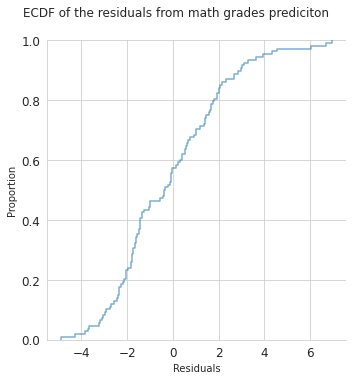

In [112]:
group_melt_res_g = group_melt.query('variable =="residual_grade" ')
_=sns.displot(data= group_melt_res_g,x="value",  kind="ecdf",alpha=0.6)
_.fig.suptitle("ECDF of the residuals from math grades prediciton", y=1.05)
_.set_xlabels("Residuals")  
plt.axvline (nine_fiv_res_g, 0,1, color="g", linestyle="--")
plt.axvline(fiv_res_g, 0,1, color="g", linestyle="--")
          

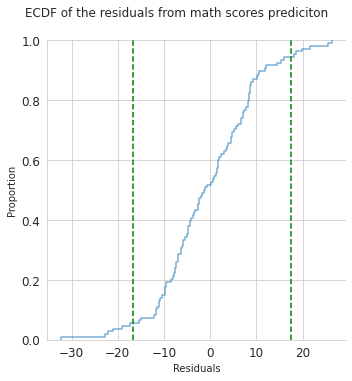

In [113]:
group_melt_res = group_melt.query('variable =="residual" ')
_=sns.displot(data= group_melt_res,x="value", kind="ecdf",alpha=0.6 )
_.fig.suptitle("ECDF of the residuals from math scores prediciton", y=1.05)
_.set_xlabels("Residuals")  
plt.axvline (nine_fiv_res, 0,1, color="g", linestyle="--")
plt.axvline(fiv_res, 0,1, color="g", linestyle="--")

## Reading

### Predict score using Ordinary least square

In [114]:
np.random.seed(42)
mask = np.random.rand(len(df)) < 0.8
df_train = df[mask]
df_test = df[~mask]
print('Training data set length='+str(len(df_train)))
print('Testing data set length='+str(len(df_test)))
                           

Training data set length=788
Testing data set length=196


In [115]:
x_test= df_test[categorical]

In [116]:
#left is the variable I want predict
formula = 'reading ~ C(gender)+ C(race)+C(par_edu)+C(lunch)+C(prep_course)'
model = smf.ols(formula, data=df_train)
results = model.fit()

SummarizeResults(results)

Intercept   67.3   (2.29e-168)
C(gender)[T.M]   -6.5   (4.32e-13)
C(race)[T.B]   3.01   (0.0798)
C(race)[T.C]   3.22   (0.0432)
C(race)[T.D]   4.74   (0.00344)
C(race)[T.E]   6.43   (0.000526)
C(par_edu)[T.HighSchool]   -1.18   (0.416)
C(par_edu)[T.Associate]   3.46   (0.0149)
C(par_edu)[T.Bach]   6.12   (0.000193)
C(par_edu)[T.College]   1.97   (0.156)
C(par_edu)[T.Master]   7.59   (0.000236)
C(lunch)[T.standard]   5.95   (2.1e-10)
C(prep_course)[T.none]   -6.62   (1.32e-12)
R^2 0.2144  (8.99e-34)
Std(ys) 13.76
Std(res) 12.2


High pvalues: 

* C(race)[T.B]   3.01   (0.0798)
* C(par_edu)[T.HighSchool]   -1.18   (0.416)
* C(par_edu)[T.College]   1.97   (0.156) 

In [117]:

df_test["reading_predictions"] =results.predict(x_test)
df_test["residual"] = df_test.reading_predictions-df_test.reading


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [118]:
df_test["residual"].std()

12.534033072092644

My predictions have a RMSE (rooth mean squared error) of 12.53

Now I'll try to predict the grades instead of scores. 

### Predict grades using poisson

In [119]:
df_train["reading_grade_int"] = df.reading_grade
df_train["reading_grade_int"].replace(map,inplace=True)
df_test["reading_grade_int"] = df.reading_grade
df_test["reading_grade_int"].replace(map,inplace=True)




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [120]:
formula = 'reading_grade_int ~ C(gender)+ C(race)+C(par_edu)+C(lunch)+C(prep_course)'
model = smf.poisson(formula, data=df_train)
results = model.fit()
print(results.summary())


Optimization terminated successfully.
         Current function value: 2.574993
         Iterations 5
                          Poisson Regression Results                          
Dep. Variable:      reading_grade_int   No. Observations:                  788
Model:                        Poisson   Df Residuals:                      775
Method:                           MLE   Df Model:                           12
Date:                Thu, 23 Dec 2021   Pseudo R-squ.:                 0.08238
Time:                        16:29:37   Log-Likelihood:                -2029.1
converged:                       True   LL-Null:                       -2211.3
Covariance Type:            nonrobust   LLR p-value:                 1.321e-70
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    1.4593      0.074     19.691      0.000       1.314

In [121]:
df_test["reading_grade_predictions"] =results.predict(x_test)
df_test["residual_grade"] = df_test.reading_grade_predictions-df_test.reading_grade_int



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [122]:
print( "RMSE :", df_test["residual_grade"].std())

RMSE : 3.1267442796272102


In [123]:
labels=[1,2,3,4,5,6,7,8,9,10,11,12]

df_test["grades_from_score_prediction"]= pd.cut(df_test["reading_predictions"], bins=[0,59,62,66,69,72,76,79,82,86,89,92,100],labels=labels).astype("int")

df_test["residual_grades_from_score_prediction"] = df_test["grades_from_score_prediction"]-df_test["reading_grade_int"]



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [124]:
print( "RMSE :", df_test["residual_grades_from_score_prediction"].std()) 

RMSE : 3.1224906199020417


In [125]:
print("Prediction mean - observed mean :",df_test["reading_predictions"].mean()-df_test["reading"].mean()) 

Prediction mean - observed mean : -0.1109581919676117


### Data mining 

#### Data mining  for scores

I know it looks the same but here I'll reveal something I did for math that I didn't show.

In [126]:
df_dummies_train = pd.get_dummies(df_train,columns=categorical)
df_dummies_train= pd.concat([df_dummies_train,df_train[categorical]] , axis=1)

df_dummies_test = pd.get_dummies(df_test,columns=categorical)
df_dummies_test = pd.concat([df_dummies_test,df_test[categorical]] , axis=1)
df_dummies_test.head()

,math,reading,writing,math_grade,reading_grade,writing_grade,reading_predictions,residual,reading_grade_int,reading_grade_predictions,residual_grade,grades_from_score_prediction,residual_grades_from_score_prediction,gender_F,gender_M,race_A,race_B,race_C,race_D,race_E,par_edu_SomeHighSchool,par_edu_HighSchool,par_edu_Associate,par_edu_Bach,par_edu_College,par_edu_Master,lunch_free/reduced,lunch_standard,prep_course_completed,prep_course_none,gender,race,par_edu,lunch,prep_course
1,69,90,88,D+,A-,B+,78.460099,-11.539901,11,7.275685,-3.724315,7,-4,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,F,C,College,standard,completed
7,40,43,39,F,F,F,59.177366,16.177366,1,2.839801,1.839801,2,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,M,B,College,free/reduced,none
11,40,52,43,F,F,F,68.352498,16.352498,1,4.484577,3.484577,4,3,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,M,D,Associate,standard,none
12,65,81,73,D,B-,C,68.485240,-12.514760,8,4.521489,-3.478511,4,-4,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,F,B,HighSchool,standard,none
34,97,87,82,A,B+,B-,68.552463,-18.447537,10,4.566675,-5.433325,4,-6,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,M,E,College,standard,none


For each "dummmy" and category we'll see $R^2$

From `list_dummies` I'll eliminate variables that are not making any difference or had a high p-value (>0.05) shown in the previous model. 

In [127]:
df_dummies_train["lunch_free"]=df_dummies_train["lunch_free/reduced"]
list_dummies = ['gender_F', 'gender_M', 'race_A',
       'race_B', 'race_C', 'race_D', 'race_E', 'par_edu_SomeHighSchool',
       'par_edu_HighSchool', 'par_edu_Associate', 'par_edu_Bach',
       'par_edu_College', 'par_edu_Master', 'lunch_free',
       'lunch_standard', 'prep_course_completed', 'prep_course_none', 'gender',
       'race', 'par_edu', 'lunch', 'prep_course', 'lunch_free']
#formula = 'reading ~ lunch ' 
#formula  += "+"+name
t=[]
for name in list_dummies:
	formula = 'reading ~ gender  + '+name
	model = smf.ols(formula, data=df_dummies_train)
	results = model.fit()
	t.append((results.rsquared, formula))

t = list(dict.fromkeys(t))

indeces=sorted(range(len(t)), key=lambda i: t[i])[:]
for i in indeces:  
  print(t[i]) 

(-0.023201973436465906, 'reading ~ gender  + gender_F')
(0.060031819292228006, 'reading ~ gender  + gender')
(0.060031819292228006, 'reading ~ gender  + gender_M')
(0.06014284501328837, 'reading ~ gender  + par_edu_College')
(0.06037516210029081, 'reading ~ gender  + race_C')
(0.0608760375148133, 'reading ~ gender  + race_B')
(0.06143028868761602, 'reading ~ gender  + race_D')
(0.06259935730379995, 'reading ~ gender  + par_edu_Associate')
(0.06364386724279592, 'reading ~ gender  + par_edu_SomeHighSchool')
(0.06983513167480193, 'reading ~ gender  + par_edu_Master')
(0.07253783882212794, 'reading ~ gender  + race_E')
(0.07279621538007075, 'reading ~ gender  + race_A')
(0.07408430761133389, 'reading ~ gender  + par_edu_Bach')
(0.07990256711907873, 'reading ~ gender  + par_edu_HighSchool')
(0.08429627161055753, 'reading ~ gender  + race')
(0.0997015817541228, 'reading ~ gender  + lunch_free')
(0.09970158175412303, 'reading ~ gender  + lunch')
(0.09970158175412303, 'reading ~ gender  + lunc

In [128]:
#df_dummies_train["lunch_free"]=df_dummies_train["lunch_free/reduced"]
list_dummies = ['race_A','race_E', 
       'par_edu_Associate', 'par_edu_Bach', 'par_edu_Master', 'gender',
      'lunch', 'prep_course']
formula = 'reading ~ lunch ' 
#formula= 'reading ~ gender  + '+name  
t=[]
for name in list_dummies:
	formula += "+"+name
	model = smf.ols(formula, data=df_dummies_train)
	results = model.fit()
	t.append((results.rsquared, formula))

t = list(dict.fromkeys(t))

indeces=sorted(range(len(t)), key=lambda i: t[i])[:]
for i in indeces:  
  print(t[i]) 

(0.05161968958122631, 'reading ~ lunch +race_A')
(0.059245198742760796, 'reading ~ lunch +race_A+race_E')
(0.061522729343905125, 'reading ~ lunch +race_A+race_E+par_edu_Associate')
(0.07931005844837347, 'reading ~ lunch +race_A+race_E+par_edu_Associate+par_edu_Bach')
(0.10008559290514618, 'reading ~ lunch +race_A+race_E+par_edu_Associate+par_edu_Bach+par_edu_Master')
(0.15259450614496428, 'reading ~ lunch +race_A+race_E+par_edu_Associate+par_edu_Bach+par_edu_Master+gender')
(0.15259450614496428, 'reading ~ lunch +race_A+race_E+par_edu_Associate+par_edu_Bach+par_edu_Master+gender+lunch')
(0.20599661946458825, 'reading ~ lunch +race_A+race_E+par_edu_Associate+par_edu_Bach+par_edu_Master+gender+lunch+prep_course')


In [129]:
formula =t[-1][1]
model = smf.ols(formula, data=df_dummies_train)
results = model.fit()
SummarizeResults(results)


Intercept   71.5   (9.78e-310)
lunch[T.standard]   5.88   (3.46e-10)
gender[T.M]   -6.52   (3.87e-13)
prep_course[T.none]   -6.63   (1.09e-12)
race_A   -3.75   (0.0108)
race_E   2.83   (0.0331)
par_edu_Associate   2.98   (0.00758)
par_edu_Bach   5.74   (3.71e-05)
par_edu_Master   7.4   (7.31e-05)
R^2 0.206  (8.62e-35)
Std(ys) 13.76
Std(res) 12.27


Just like before a worse model but higher confidence.

I went deleting variables from `list_dummies` until I was satisfied.

Now I'll use that same list to subset the data frame thus constructing my `x_test` that I can feed to the `predict()` method.

In [130]:

x_test_dummy = df_dummies_test[list_dummies]
df_test["reading_predictions"] =results.predict(x_test_dummy)
df_test["residual"] = df_dummies_test.reading - df_test["reading_predictions"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [131]:
print("Std of target :" ,df_test["reading"].std(),"RMSE :",df_test["residual"].std())

Std of target : 14.109880339024155 RMSE : 12.641473754836783


In [132]:
print("Predition mean - observed mean :",df_test["reading_predictions"].mean()-df_test["reading"].mean()) 

Predition mean - observed mean : -0.033080126120751174


Has I though the RMSE from the predictions is not better. But I'm more confident that after if we test it over and over we would get more consistent values.

#### Data mining for grades 

In [133]:
df_dummies_train.columns

Index(['math', 'reading', 'writing', 'math_grade', 'reading_grade',
       'writing_grade', 'reading_grade_int', 'gender_F', 'gender_M', 'race_A',
       'race_B', 'race_C', 'race_D', 'race_E', 'par_edu_SomeHighSchool',
       'par_edu_HighSchool', 'par_edu_Associate', 'par_edu_Bach',
       'par_edu_College', 'par_edu_Master', 'lunch_free/reduced',
       'lunch_standard', 'prep_course_completed', 'prep_course_none', 'gender',
       'race', 'par_edu', 'lunch', 'prep_course', 'lunch_free'],
      dtype='object')

In [134]:
#df_dummies_train["lunch_free"]=df_dummies_train["lunch_free/reduced"]
list_dummies = ['race_A','race_B', 'race_C', 'race_D', 'race_E', 'par_edu_SomeHighSchool',
       'par_edu_HighSchool', 'par_edu_Associate', 'par_edu_Bach',
       'par_edu_College','par_edu_Master',
       'race', 'par_edu']
#formula = 'reading ~ lunch ' 
formula   += "+"+name
t=[]
for name in list_dummies:
	formula = 'reading ~ gender  + prep_course+ lunch+'+name
	model = smf.poisson(formula, data=df_dummies_train)
	results = model.fit()
	t.append((results.llf, formula))

t = list(dict.fromkeys(t))

indeces=sorted(range(len(t)), key=lambda i: t[i])[:]
for i in indeces:  
  print(t[i]) 

Optimization terminated successfully.
         Current function value: 4.186721
         Iterations 4
Optimization terminated successfully.
         Current function value: 4.197727
         Iterations 4
Optimization terminated successfully.
         Current function value: 4.198948
         Iterations 4
Optimization terminated successfully.
         Current function value: 4.195724
         Iterations 4
Optimization terminated successfully.
         Current function value: 4.189413
         Iterations 4
Optimization terminated successfully.
         Current function value: 4.190383
         Iterations 4
Optimization terminated successfully.
         Current function value: 4.179340
         Iterations 4
Optimization terminated successfully.
         Current function value: 4.196505
         Iterations 4
Optimization terminated successfully.
         Current function value: 4.184096
         Iterations 4
Optimization terminated successfully.
         Current function value: 4.199514
  

In [135]:
formula = 'reading_grade_int ~  race +par_edu_Master+gender+lunch+par_edu_Bach+prep_course+par_edu_HighSchool'

model = smf.poisson(formula, data=df_dummies_train)
results = model.fit()
print(results.summary())


Optimization terminated successfully.
         Current function value: 2.579760
         Iterations 5
                          Poisson Regression Results                          
Dep. Variable:      reading_grade_int   No. Observations:                  788
Model:                        Poisson   Df Residuals:                      777
Method:                           MLE   Df Model:                           10
Date:                Thu, 23 Dec 2021   Pseudo R-squ.:                 0.08068
Time:                        16:29:38   Log-Likelihood:                -2032.9
converged:                       True   LL-Null:                       -2211.3
Covariance Type:            nonrobust   LLR p-value:                 1.421e-70
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.5285      0.067     22.763      0.000       1.397       1.660
ra

MLE went from *-2029.1*  to  *--2032.9*  but now I'm more convident about the results becasue every independent variable used has a  p-value $<0.05$

In [136]:
list_cols = ["race","par_edu_HighSchool","par_edu_Bach","par_edu_Master","gender","lunch","prep_course"]

x_test_dummy = df_dummies_test[list_cols]
df_test["reading_grade_predictions"] =results.predict(x_test_dummy)
df_test["residual_grade"] = df_dummies_test.reading_grade_int - df_test["reading_grade_predictions"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [137]:
print("Std of target :" ,df_test["reading"].std(),"RMSE :",df_test["residual"].std())

Std of target : 14.109880339024155 RMSE : 12.641473754836783


In [138]:
print("Predition mean - observed mean :",df_test["reading_predictions"].mean()-df_test["reading"].mean()) 


Predition mean - observed mean : -0.033080126120751174


### Viz

In [139]:
group = df_test.groupby(categorical).agg({
    "reading_predictions":"mean",
    "reading":"mean",
    "residual":"mean",
    "reading_grade_int":"mean",
    "reading_grade_predictions":"mean",
    "residual_grade":"mean",
    "grades_from_score_prediction":"mean",
    "residual_grades_from_score_prediction":"mean"})
group=group.dropna()
group=group.reset_index().reset_index()
group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   index                                  108 non-null    int64   
 1   gender                                 108 non-null    category
 2   race                                   108 non-null    category
 3   par_edu                                108 non-null    category
 4   lunch                                  108 non-null    category
 5   prep_course                            108 non-null    category
 6   reading_predictions                    108 non-null    float64 
 7   reading                                108 non-null    float64 
 8   residual                               108 non-null    float64 
 9   reading_grade_int                      108 non-null    float64 
 10  reading_grade_predictions              108 non-null    float64

We have 108 different subjects and the means for the values and predictions.

In [140]:
vars=['reading_predictions', 'reading', 'residual', 'reading_grade_int',
       'reading_grade_predictions', 'residual_grade',
       'grades_from_score_prediction',
       'residual_grades_from_score_prediction']
group_melt = pd.melt(group, id_vars = "index",value_vars=vars)
group_melt.head()

,index,variable,value
0,0,reading_predictions,73.600178
1,1,reading_predictions,77.346524
2,2,reading_predictions,70.717666
3,3,reading_predictions,64.834495
4,4,reading_predictions,77.346524


In [141]:
group_melt_res = group_melt.query('variable == "residual"')
group_melt_res_g = group_melt.query('variable == "residual grade"')
nine_fiv_res =group_melt_res.value.quantile(.95) 
fiv_res=group_melt_res.value.quantile(.05)
print("90 % Confidence interval for scores residuals")
print("95th percentile: ",round(nine_fiv_res,4),"5th percentile: ",round(fiv_res,4))

90 % Confidence interval for scores residuals
95th percentile:  15.2078 5th percentile:  -19.2041


In [142]:
nine_fiv_res_g =group_melt_res_g.value.quantile(.95) 
fiv_res_g=group_melt_res_g.value.quantile(.05)
print("90 % Confidence interval for grades residuals")
print("95th percentile: ",round(nine_fiv_res_g,4),"5th percentile: ",round(fiv_res_g,4))

90 % Confidence interval for grades residuals
95th percentile:  nan 5th percentile:  nan


In [143]:
print("Convert to scores for reference")
print("95th percentile: ",round(nine_fiv_res_g*(41/11),4),"5th percentile: ",round(fiv_res_g*(41/11),4))

Convert to scores for reference
95th percentile:  nan 5th percentile:  nan


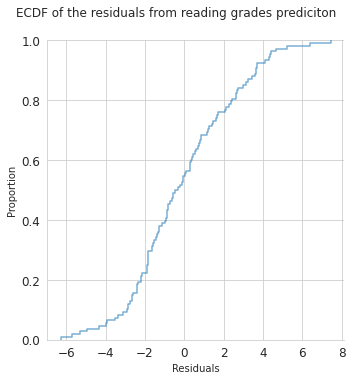

In [144]:
group_melt_res_g = group_melt.query('variable =="residual_grade" ')
_=sns.displot(data= group_melt_res_g,x="value",  kind="ecdf",alpha=0.6)
_.fig.suptitle("ECDF of the residuals from reading grades prediciton", y=1.05)
_.set_xlabels("Residuals")  
plt.axvline (nine_fiv_res_g, 0,1, color="g", linestyle="--")
plt.axvline(fiv_res_g, 0,1, color="g", linestyle="--")
          

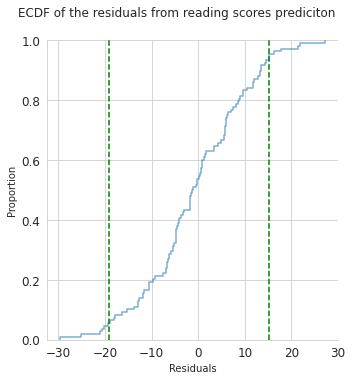

In [145]:
group_melt_res = group_melt.query('variable =="residual" ')
_=sns.displot(data= group_melt_res,x="value", kind="ecdf",alpha=0.6 )
_.fig.suptitle("ECDF of the residuals from reading scores prediciton", y=1.05)
_.set_xlabels("Residuals")  
plt.axvline (nine_fiv_res, 0,1, color="g", linestyle="--")
plt.axvline(fiv_res, 0,1, color="g", linestyle="--")

## writing

### Predict score using Ordinary least square

In [146]:
np.random.seed(42)
mask = np.random.rand(len(df)) < 0.8
df_train = df[mask]
df_test = df[~mask]
print('Training data set length='+str(len(df_train)))
print('Testing data set length='+str(len(df_test)))
                           

Training data set length=788
Testing data set length=196


In [147]:
x_test= df_test[categorical]

In [148]:
#left is the variable I want predict
formula = 'writing ~ C(gender)+ C(race)+C(par_edu)+C(lunch)+C(prep_course)'
model = smf.ols(formula, data=df_train)
results = model.fit()

SummarizeResults(results)

Intercept   66.6   (1.32e-173)
C(gender)[T.M]   -8.6   (1.19e-22)
C(race)[T.B]   2.96   (0.0734)
C(race)[T.C]   3.34   (0.0295)
C(race)[T.D]   6.63   (2.31e-05)
C(race)[T.E]   5.42   (0.00242)
C(par_edu)[T.HighSchool]   -1.06   (0.446)
C(par_edu)[T.Associate]   4.77   (0.000519)
C(par_edu)[T.Bach]   8.87   (2.49e-08)
C(par_edu)[T.College]   3.66   (0.0063)
C(par_edu)[T.Master]   10.2   (3.68e-07)
C(lunch)[T.standard]   6.84   (4.83e-14)
C(prep_course)[T.none]   -8.9   (2.02e-22)
R^2 0.324  (3.5e-58)
Std(ys) 14.31
Std(res) 11.77


In [149]:

df_test["writing_predictions"] =results.predict(x_test)
df_test["residual"] = df_test.writing_predictions-df_test.writing
df_test["residual"].std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


11.817994069889505

My predictions have a RMSE (rooth mean squared error) of 11.81

Now I'll try to predict the grades instead of scores. 

### Predict grades using poisson

In [150]:
df_train["writing_grade_int"] = df.writing_grade
df_train["writing_grade_int"].replace(map,inplace=True)
df_test["writing_grade_int"] = df.writing_grade
df_test["writing_grade_int"].replace(map,inplace=True)




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [151]:
formula = 'writing_grade_int ~ C(gender)+ C(race)+C(par_edu)+C(lunch)+C(prep_course)'
model = smf.poisson(formula, data=df_train)
results = model.fit()
print(results.summary())


Optimization terminated successfully.
         Current function value: 2.439161
         Iterations 5
                          Poisson Regression Results                          
Dep. Variable:      writing_grade_int   No. Observations:                  788
Model:                        Poisson   Df Residuals:                      775
Method:                           MLE   Df Model:                           12
Date:                Thu, 23 Dec 2021   Pseudo R-squ.:                  0.1346
Time:                        16:29:40   Log-Likelihood:                -1922.1
converged:                       True   LL-Null:                       -2221.0
Covariance Type:            nonrobust   LLR p-value:                3.016e-120
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    1.3707      0.078     17.644      0.000       1.218

In [152]:
df_test["writing_grade_predictions"] =results.predict(x_test)
df_test["residual_grade"] = df_test.writing_grade_predictions-df_test.writing_grade_int



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [153]:
print( "RMSE :", df_test["residual_grade"].std())

RMSE : 2.877878459988252


In [154]:
labels=[1,2,3,4,5,6,7,8,9,10,11,12]

df_test["grades_from_score_prediction"]= pd.cut(df_test["writing_predictions"], bins=[0,59,62,66,69,72,76,79,82,86,89,92,100],labels=labels).astype("int")

df_test["residual_grades_from_score_prediction"] = df_test["grades_from_score_prediction"]-df_test["writing_grade_int"]



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [155]:
print( "RMSE :", df_test["residual_grades_from_score_prediction"].std()) 

RMSE : 2.8787461658123807


In [156]:
print("Predition mean - observed mean :",df_test["writing_predictions"].mean()-df_test["writing"].mean()) 

Predition mean - observed mean : -0.09128177886638866


### Data mining 

#### Data mining for scores

In [157]:
df_dummies_train = pd.get_dummies(df_train,columns=categorical)
df_dummies_train= pd.concat([df_dummies_train,df_train[categorical]] , axis=1)

df_dummies_test = pd.get_dummies(df_test,columns=categorical)
df_dummies_test = pd.concat([df_dummies_test,df_test[categorical]] , axis=1)
df_dummies_test.head()

,math,reading,writing,math_grade,reading_grade,writing_grade,writing_predictions,residual,writing_grade_int,writing_grade_predictions,residual_grade,grades_from_score_prediction,residual_grades_from_score_prediction,gender_F,gender_M,race_A,race_B,race_C,race_D,race_E,par_edu_SomeHighSchool,par_edu_HighSchool,par_edu_Associate,par_edu_Bach,par_edu_College,par_edu_Master,lunch_free/reduced,lunch_standard,prep_course_completed,prep_course_none,gender,race,par_edu,lunch,prep_course
1,69,90,88,D+,A-,B+,80.409907,-7.590093,10,7.994151,-2.005849,8,-2,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,F,C,College,standard,completed
7,40,43,39,F,F,F,55.687552,16.687552,1,2.359676,1.359676,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,M,B,College,free/reduced,none
11,40,52,43,F,F,F,67.310918,24.310918,1,4.252877,3.252877,4,3,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,M,D,Associate,standard,none
12,65,81,73,D,B-,C,66.409621,-6.590379,6,4.028477,-1.971523,4,-2,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,F,B,HighSchool,standard,none
34,97,87,82,A,B+,B-,64.990955,-17.009045,8,3.845763,-4.154237,3,-5,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,M,E,College,standard,none


For each "dummmy" and category we'll see $R^2$

In [158]:
df_dummies_train.columns

Index(['math', 'reading', 'writing', 'math_grade', 'reading_grade',
       'writing_grade', 'writing_grade_int', 'gender_F', 'gender_M', 'race_A',
       'race_B', 'race_C', 'race_D', 'race_E', 'par_edu_SomeHighSchool',
       'par_edu_HighSchool', 'par_edu_Associate', 'par_edu_Bach',
       'par_edu_College', 'par_edu_Master', 'lunch_free/reduced',
       'lunch_standard', 'prep_course_completed', 'prep_course_none', 'gender',
       'race', 'par_edu', 'lunch', 'prep_course'],
      dtype='object')

In [159]:
df_dummies_train["lunch_free"]=df_dummies_train["lunch_free/reduced"]
list_dummies = [ 'race_A', 'race_D', 'race_E', 'par_edu_Associate', 'par_edu_Bach', 'par_edu_College',
       'par_edu_Master',  'lunch', 'prep_course']
#formula = 'writing ~ lunch ' 
#formula  += "+"+name
t=[]
for name in list_dummies:
	formula = 'writing ~ gender  + '+name
	model = smf.ols(formula, data=df_dummies_train)
	results = model.fit()
	t.append((results.rsquared, formula))

t = list(dict.fromkeys(t))

indeces=sorted(range(len(t)), key=lambda i: t[i])[:]
for i in indeces:  
  print(t[i]) 

(0.09646063492745749, 'writing ~ gender  + par_edu_College')
(0.09890868721058255, 'writing ~ gender  + par_edu_Associate')
(0.10275782998556415, 'writing ~ gender  + race_E')
(0.10572008083468398, 'writing ~ gender  + race_D')
(0.11174423130659727, 'writing ~ gender  + par_edu_Master')
(0.1117587307290615, 'writing ~ gender  + race_A')
(0.12066547448253584, 'writing ~ gender  + par_edu_Bach')
(0.14197893435020847, 'writing ~ gender  + lunch')
(0.1867760349221559, 'writing ~ gender  + prep_course')


In [160]:
formula = 'writing ~ lunch ' 
#formula  = 'writing ~ lunch  + '+name
t=[]
for name in list_dummies:
	formula += "+"+name
	model = smf.ols(formula, data=df_dummies_train)
	results = model.fit()
	t.append((results.rsquared, formula))

t = list(dict.fromkeys(t))

indeces=sorted(range(len(t)), key=lambda i: t[i])[:]
for i in indeces:  
  print(t[i]) 

(0.06048444826354393, 'writing ~ lunch +race_A')
(0.06584165127652264, 'writing ~ lunch +race_A+race_D')
(0.07142613967165812, 'writing ~ lunch +race_A+race_D+race_E')
(0.07434140778252507, 'writing ~ lunch +race_A+race_D+race_E+par_edu_Associate')
(0.10535514719352745, 'writing ~ lunch +race_A+race_D+race_E+par_edu_Associate+par_edu_Bach')
(0.11085609167925548, 'writing ~ lunch +race_A+race_D+race_E+par_edu_Associate+par_edu_Bach+par_edu_College')
(0.14921940975126347, 'writing ~ lunch +race_A+race_D+race_E+par_edu_Associate+par_edu_Bach+par_edu_College+par_edu_Master')
(0.14921940975126347, 'writing ~ lunch +race_A+race_D+race_E+par_edu_Associate+par_edu_Bach+par_edu_College+par_edu_Master+lunch')
(0.23411551276292253, 'writing ~ lunch +race_A+race_D+race_E+par_edu_Associate+par_edu_Bach+par_edu_College+par_edu_Master+lunch+prep_course')


In [161]:
formula =t[-1][1]
model = smf.ols(formula, data=df_dummies_train)
results = model.fit()
SummarizeResults(results)


Intercept   64.8   (1.56e-262)
lunch[T.standard]   6.69   (3.33e-12)
prep_course[T.none]   -8.69   (1.56e-19)
race_A   -4.11   (0.00791)
race_D   3.12   (0.00399)
race_E   1.98   (0.159)
par_edu_Associate   5.72   (3.82e-06)
par_edu_Bach   10.1   (2.33e-11)
par_edu_College   4.57   (0.000128)
par_edu_Master   12.1   (8.88e-10)
R^2 0.2341  (5.67e-40)
Std(ys) 14.31
Std(res) 12.53


In [162]:

x_test_dummy = df_dummies_test[list_dummies]
df_test["writing_predictions"] =results.predict(x_test_dummy)
df_test["residual"] = df_dummies_test.writing - df_test["writing_predictions"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [163]:
print("Std of target :" ,df_test["writing"].std(), "RMSE :",df_test["residual"].std())

Std of target : 14.540342478531514 RMSE : 13.257606275163594


In [164]:
print("Predition mean - observed mean :",df_test["writing_predictions"].mean()-df_test["writing"].mean()) 

Predition mean - observed mean : -0.3001944080791219


### Viz

In [165]:
group = df_test.groupby(categorical).agg({
    "writing_predictions":"mean",
    "writing":"mean",
    "residual":"mean",
    "writing_grade_int":"mean",
    "writing_grade_predictions":"mean",
    "residual_grade":"mean",
    "grades_from_score_prediction":"mean",
    "residual_grades_from_score_prediction":"mean"})
group=group.dropna()
group=group.reset_index().reset_index()
group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   index                                  108 non-null    int64   
 1   gender                                 108 non-null    category
 2   race                                   108 non-null    category
 3   par_edu                                108 non-null    category
 4   lunch                                  108 non-null    category
 5   prep_course                            108 non-null    category
 6   writing_predictions                    108 non-null    float64 
 7   writing                                108 non-null    float64 
 8   residual                               108 non-null    float64 
 9   writing_grade_int                      108 non-null    float64 
 10  writing_grade_predictions              108 non-null    float64

In [166]:
vars=['writing_predictions', 'writing', 'residual', 'writing_grade_int',
       'writing_grade_predictions', 'residual_grade',
       'grades_from_score_prediction',
       'residual_grades_from_score_prediction']
group_melt = pd.melt(group, id_vars = "index",value_vars=vars)
group_melt.head()

,index,variable,value
0,0,writing_predictions,67.424783
1,1,writing_predictions,71.537665
2,2,writing_predictions,62.844620
3,3,writing_predictions,56.150684
4,4,writing_predictions,71.537665


In [167]:
group_melt_res = group_melt.query('variable == "residual"')
group_melt_res_g = group_melt.query('variable == "residual grade"')
nine_fiv_res =group_melt_res.value.quantile(.95) 
fiv_res=group_melt_res.value.quantile(.05)
print("90 % Confidence interval for scores residuals")
print("95th percentile: ",round(nine_fiv_res,4),"5th percentile: ",round(fiv_res,4))

90 % Confidence interval for scores residuals
95th percentile:  15.7092 5th percentile:  -20.7832


In [168]:
nine_fiv_res_g =group_melt_res_g.value.quantile(.95) 
fiv_res_g=group_melt_res_g.value.quantile(.05)
print("90 % Confidence interval for grades residuals")
print("95th percentile: ",round(nine_fiv_res_g,4),"5th percentile: ",round(fiv_res_g,4))

90 % Confidence interval for grades residuals
95th percentile:  nan 5th percentile:  nan


In [169]:
print("Convert to scores for reference")
print("95th percentile: ",round(nine_fiv_res_g*(41/11),4),"5th percentile: ",round(fiv_res_g*(41/11),4))

Convert to scores for reference
95th percentile:  nan 5th percentile:  nan


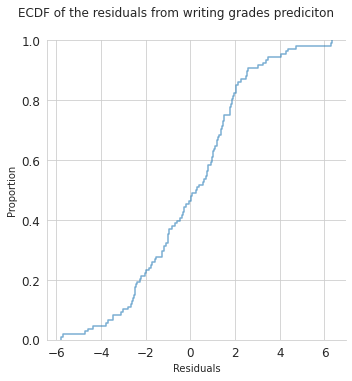

In [170]:
group_melt_res_g = group_melt.query('variable =="residual_grade" ')
_=sns.displot(data= group_melt_res_g,x="value",  kind="ecdf",alpha=0.6)
_.fig.suptitle("ECDF of the residuals from writing grades prediciton", y=1.05)
_.set_xlabels("Residuals")  
plt.axvline (nine_fiv_res_g, 0,1, color="g", linestyle="--")
plt.axvline(fiv_res_g, 0,1, color="g", linestyle="--")
          

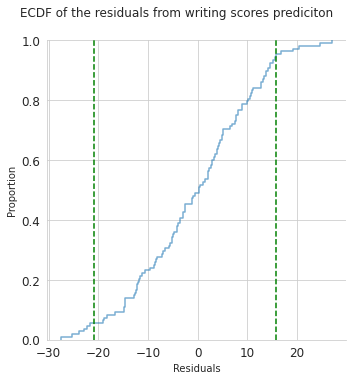

In [171]:
group_melt_res = group_melt.query('variable =="residual" ')
_=sns.displot(data= group_melt_res,x="value", kind="ecdf",alpha=0.6 )
_.fig.suptitle("ECDF of the residuals from writing scores prediciton", y=1.05)
_.set_xlabels("Residuals")  
plt.axvline (nine_fiv_res, 0,1, color="g", linestyle="--")
plt.axvline(fiv_res, 0,1, color="g", linestyle="--")

# Evaluating the predictions

In [172]:
from sklearn.metrics import confusion_matrix

In [173]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

## Testing scores

In [174]:
y_true = df_test.writing.values

y_pred = round(df_test.writing_predictions).astype("int").values

print("Accuracy:",round(accuracy_score(y_true, y_pred),3))
print("Precision:",round(precision_score(y_true, y_pred,average="macro"),3)) 
print("F1_score :",round(f1_score(y_true, y_pred,average="macro"),3))


Accuracy: 0.036
Precision: 0.012
F1_score : 0.014


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Testing grades

In [175]:
y_true = df_test.writing_grade_int.values

y_pred = round(df_test.writing_grade_predictions).astype("int").values

print("Accuracy:",round(accuracy_score(y_true, y_pred),3))
print("Precision:",round(precision_score(y_true, y_pred,average="macro"),3)) 
print("F1_score :",round(f1_score(y_true, y_pred,average="macro"),3))


Accuracy: 0.128
Precision: 0.098
F1_score : 0.092


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


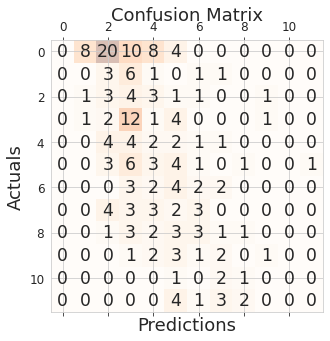

In [176]:
conf_matrix = confusion_matrix(y_true=y_true, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## Groups 

`group` is a dataframe with the 108 unique combinations of the categorical variables.

I'll get the average score and grade for each the observed and predict values. Round that number. And calculate accuracy, precision and f1_score. 


In [177]:
y_true = round(group.writing).astype("int").values

y_pred = round(group.writing_predictions).astype("int").values
print("Accuracy:",round(accuracy_score(y_true, y_pred),3))
print("Precision:",round(precision_score(y_true, y_pred,average="macro"),3)) 
print("F1_score :",round(f1_score(y_true, y_pred,average="macro"),3))

Accuracy: 0.019
Precision: 0.023
F1_score : 0.01


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [178]:
y_true = round(group.writing_grade_int).astype("int").values

y_pred = round(group.writing_grade_predictions).astype("int").values

print("Accuracy:",round(accuracy_score(y_true, y_pred),3))
print("Precision:",round(precision_score(y_true, y_pred,average="macro"),3)) 
print("F1_score :",round(f1_score(y_true, y_pred,average="macro"),3))

Accuracy: 0.12
Precision: 0.077
F1_score : 0.086


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


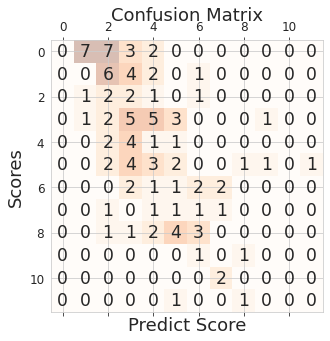

In [179]:
conf_matrix = confusion_matrix(y_true=y_true, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predict Score', fontsize=18)
plt.ylabel('Scores', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()